# Candy Power Ranking
## Market research data 

The data is part of the candy power ranking dataset from FiveThirtyEight (https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/candy-data.csv). 

The dataset contains 85 rows and 13 columns. The columns are as follows:
| **Feature**            | **Description**                                                                  | **Range**      |
|-----------------------|----------------------------------------------------------------------------------|----------------|
| **chocolate**          | Does it contain chocolate?                                                       | 0 or 1         |
| **fruity**             | Is it fruit flavored?                                                            | 0 or 1         |
| **caramel**            | Is there caramel in the candy?                                                   | 0 or 1         |
| **peanutalmondy**      | Does it contain peanuts, peanut butter, or almonds?                              | 0 or 1         |
| **nougat**             | Does it contain nougat?                                                          | 0 or 1         |
| **crispedricewafer**   | Does it contain crisped rice, wafers, or a cookie component?                      | 0 or 1         |
| **hard**               | Is it a hard candy?                                                              | 0 or 1         |
| **bar**                | Is it a candy bar?                                                               | 0 or 1         |
| **pluribus**           | Is it one of many candies in a bag or box? (e.g., individually wrapped candies)  | 0 or 1         |
| **sugarpercent**       | The percentile of sugar it falls under within the dataset.                       | 0.011 - 0.988  |
| **pricepercent**       | The unit price percentile compared to the rest of the set.                        | 0.011 - 0.976  |
| **winpercent**         | The overall win percentage according to 269,000 matchups.                        | 22.45 - 84.18  |

**Note**: Although `sugarpercent` and `pricepercent` are expressed as percentile-like scores and theoretically could range from 0.0 to 1.0 (0% to 100%), the actual observed values in this dataset range approximately from **0.011 to 0.988** for sugar, and **0.011 to 0.976** for price. This reflects the real distribution of candies in this dataset and may be influenced by:

- **Sampling**: The dataset likely includes only mainstream candies, omitting extreme outliers (e.g., ultra-sugar-free or luxury priced items).
- **Normalization relative to dataset**: Percentile scaling applied only within the set of candies represented.

Similarly, `winpercent` (popularity score) ranges from **22.45% to 84.18%**, showing that no candy is universally loved or hated in these 269,000 matchups, possibly due to dataset curation or natural popularity variance.

**Binary Features**: The first eight columns are binary features, indicating the presence (1) or absence (0) of certain ingredients or characteristics in the candy. These features are categorical, as they represent a yes/no choice for each candy.


# Methodology

To analyze the data and derive actionable insights, I to some extent follow the well knwon CRISP-DM methodology. 

## 1. Business Understanding


### Objective

The purpose of this analysis is to **evaluate the impact of various candy characteristics on their overall popularity**.  
Using the available **market research data**, we aim to:

- **Identify** which features and ingredients are most favored by consumers.
- **Analyze** which characteristics are less well-received.
- **Understand** key trends and preferences in the current candy market.

The insights derived from this analysis will serve as a **data-driven foundation** for the **development of a new private-label candy for Lidl**.  

**Outcome**: Based on the findings, we will provide a **clear recommendation** on the essential characteristics the new candy should have to **maximize customer appeal** and **market success**.

-----

### Private Label Products:
A **private label product** is a product that is **manufactured by a third-party producer** but **sold under a retailer's own brand name**. Private label products are often **cheaper** than national brands and aim to offer **comparable quality**.

A recent study conducted by **Oliver Wyman** revealed that **41% of German customers prefer private label products** over national brands, while **89% of customers expect private label products to offer the same quality** as national brands.

The study further highlights that an **increasing number of customers are switching from national brands to private label products**, especially in the **milk products** and **breakfast cereals** categories. However, this trend is **less pronounced in the candy segment**.  
(Source: [Lebensmittel Praxis](https://lebensmittelpraxis.de/handel-aktuell/42049-einzelhandelstrend-setzt-sich-fort-weitere-studie-bestaetigt-wachsende-beliebtheit-von-eigenmarken.html))

-----
### General Market Trends

#### 1. Market Overview  
Europe leads in global candy launches with a **41% share**, showing **4% growth** over the past five years.  
**Spain** demonstrates the highest growth in product launches, with a **22% Compound Annual Growth Rate (CAGR)**.  

#### 2. Key Trends  
- **Vegan**, **clean-label**, and **seasonal editions** drive product innovation.  
- **Mixed assortments** and **gummies/jellies** are leading categories.  
- Increasing focus on **health-related claims** (e.g., gluten-free, vegan).  

#### 3. Flavor and Texture  
- **Top flavors**: fruit, strawberry, lemon, milk chocolate.  
- **Emerging flavors**: pistachio, blueberry, watermelon.  

**Regional preferences**:  
- **Netherlands**: licorice, green apple  
- **Germany**: dark chocolate, vanilla  
- **Spain**: almond, hazelnut, dark chocolate  

**Summary**: The candy market is **dynamic and diverse**, driven by **innovation** and **health-conscious choices**. **Taste, texture, and health claims** are key factors shaping purchasing decisions, with consumers seeking **variety, novelty, and experimentation**.  

(Source: [Innova Market Insights](https://www.innovamarketinsights.com/de/trends/suessigkeiten-trends/))


-----

**Insights:**

- **Consumer Preferences**: Consumers are increasingly seeking **healthier, innovative, and diverse candy options**.
    - **Recommendation**: The new candy product should offer **healthier ingredients**, **innovative flavors**, and **diverse textures** to cater to consumer preferences. Thus perhaps not that much sugar in the new candy would be a good idea.

- **Regional Variations**: Preferences for flavors and ingredients vary across countries and should be considered in product development. (e.g., licorice in the Netherlands, dark chocolate in Germany)
    - **Recommendation**: The new candy should offer a **variety of flavors** to cater to different regional preferences.

- **Private Label Growth**: Private label products are gaining popularity, with quality and price being key factors for consumers. 
    - **Recommendation**: The new candy should offer **comparable quality** to national brands at a **competitive price** to attract customers.

- **Market Trends**: Key trends include **vegan, clean-label, and seasonal products**, with a focus on **health claims** and **flavor variety**.
    - **Recommendation**: The new candy product should align with these trends to **maximize market appeal** and **customer satisfaction**. Perhaps a Vegan option would be a good idea.


-----
- To sum it up:
    - Regional preferences should be considered and a variety of flavors should be offered (based on the region the candy is sold in)
    - Less sugar and a comparably low price to accout for the health trend and the price sensitivity of the customers
    - Vegan or Clean-Label options should be considered to carther the overall market trend regarding health and sustainability


## 2. Data Understanding 

In [1]:
# import basic libraries
import pandas as pd
import numpy as np

# add src to path
import sys
import os
sys.path.append(os.path.abspath('../src'))

import utils
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# define some constants
RAW_DATA_PATH = "../data/raw/candy-data.csv"
PROCESSED_DATA_PATH = "../data/processed/candy-data.csv"


# defining some column groups for easier access

# ingredients or main components of the candy / Zutaten & Geschmaksrichtungen
CANDY_INGREDIENTS = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer']
# packaging or type of the candy (hard, bar or multiple pieces) / Darreichungsform
CANDY_FORM = ['hard', 'bar', 'pluribus']
# sugar and price composition of the candy related to the total dataset / Zucker- und Preisverhältnis
CANDY_COMPOSITION = ['sugarpercent', 'pricepercent']
# target variable or the popularity of the candy / Beliebtheit
CANDY_POPULARITY = ['winpercent']


In [2]:
# load the raw data
raw_data = utils.load_data_from_file(RAW_DATA_PATH)


Data loaded successfully from: ../data/raw/candy-data.csv


### Data Exploration


In [3]:
raw_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


The data shows some interesting points. 
- First a candy can be made of differnt ingredient combinations, such as chocolate, fruity, caramel, peanutalmondy, nougat, crispedricewafer
- The candy can be hard, a bar or packed in a bag or box
- Some candies contain lots of more sugar compared to others and also differ in price
- Some candies do not contain any ingredients or form characteristics

Moreover, at first glance, "One Dime" and "One Quarter" might be mistaken for some form of penny candy. However, a review of the original source ([FiveThirtyEight: The Ultimate Halloween Candy Power Ranking](https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/)) indicates that these are **not candies** but **coins** inserted as humorous control items. As such, they should be **excluded from the dataset for all analyses**.


In [4]:
# drop One dime and One quarter "candies"
prepared_data = raw_data.copy()
prepared_data = prepared_data[~prepared_data["competitorname"].isin(["One dime", "One quarter"])]
prepared_data = prepared_data.reset_index(drop=True)


In [5]:
# Lets check for missing values in the dataset

missing_values = utils.check_missing_values(prepared_data)
missing_values

Checking for missing values in the data...
No missing values found in the data.


competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [6]:
# Lets check for duplicates in the dataset

duplicate_values = utils.check_duplicates(prepared_data)
duplicate_values

Checking for duplicate rows in the data...
No duplicate rows found in the data.


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent


#### Numerical Features

In [7]:
# now lets check the distribution of the numerical features

prepared_data[CANDY_COMPOSITION + CANDY_POPULARITY].describe()

,sugarpercent,pricepercent,winpercent
count,83.000000,83.000000,83.000000
mean,0.489916,0.472627,50.584908
std,0.276498,0.286503,14.748880
min,0.034000,0.011000,22.445341
25%,0.267000,0.261000,39.163280
50%,0.465000,0.465000,48.982651
75%,0.732000,0.703000,60.332349
max,0.988000,0.976000,84.180290


In [8]:
# since winpercent is sclaed between 0 and 100 we need to scale it between 0 and 1 to make it comparable with the other features
prepared_data['winpercent'] = prepared_data['winpercent'] / 100
prepared_data[CANDY_COMPOSITION + CANDY_POPULARITY].describe()

,sugarpercent,pricepercent,winpercent
count,83.000000,83.000000,83.000000
mean,0.489916,0.472627,0.505849
std,0.276498,0.286503,0.147489
min,0.034000,0.011000,0.224453
25%,0.267000,0.261000,0.391633
50%,0.465000,0.465000,0.489827
75%,0.732000,0.703000,0.603323
max,0.988000,0.976000,0.841803


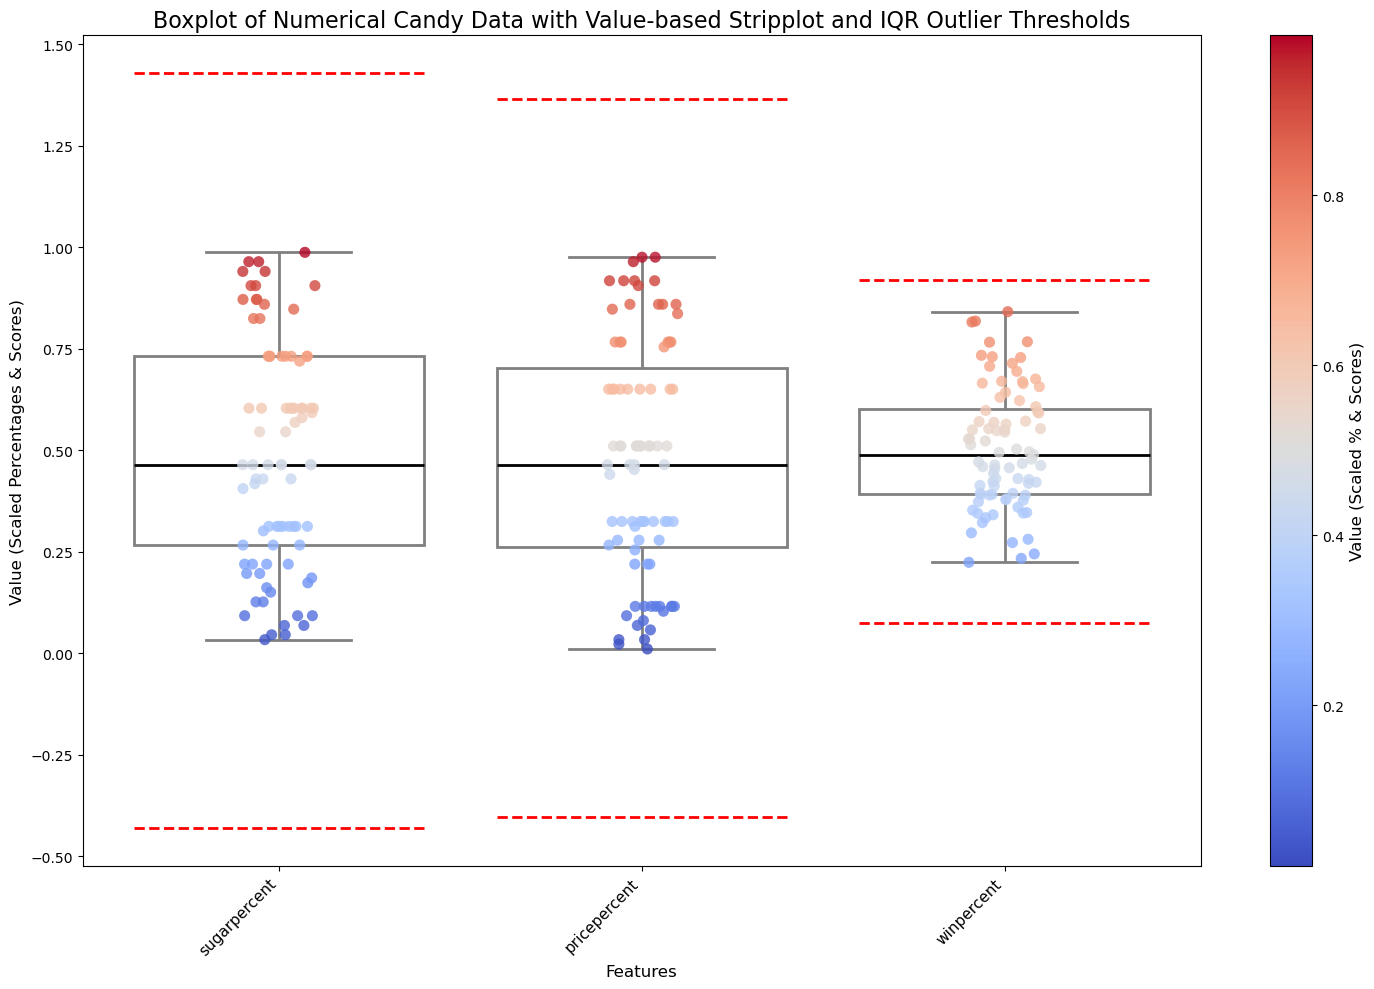

In [9]:
# check for outlier in the numerical columns (sugarpercent, pricepercent, winpercent)
# therefore i create a box plot for each numerical column combined with a scatter plot for visual inspection firs
# to identify outliers i will just use the IQR method

utils.plot_numerical_data_with_iqr(
    prepared_data[CANDY_COMPOSITION + CANDY_POPULARITY],
    CANDY_COMPOSITION + CANDY_POPULARITY
)



From the boxplots we can see that our data does not conatin outliers in the numerical columns.
Thus, we can proceed.

sugarpercent: W=0.952, p-value=0.004
→ sugarpercent is NOT normally distributed (reject H0)
pricepercent: W=0.944, p-value=0.001
→ pricepercent is NOT normally distributed (reject H0)
winpercent: W=0.978, p-value=0.171
→ winpercent looks normally distributed (fail to reject H0)
-----
sugarpercent:
Skewness (0.10017986248767527): Right (positively) skewed: More data points on the left, tail extending to the right.
Kurtosis (-1.13866516815752): Platykurtic (light tails): Fewer outliers, flatter peak.


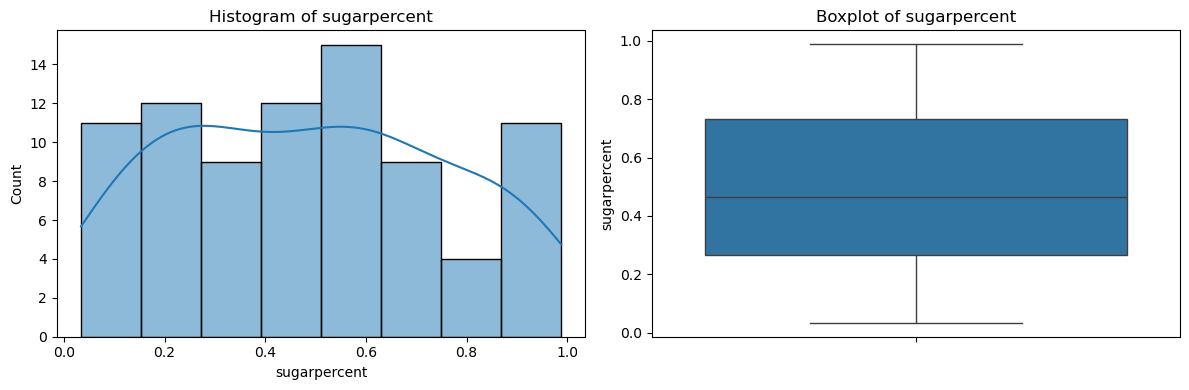

pricepercent:
Skewness (0.1179877212233998): Right (positively) skewed: More data points on the left, tail extending to the right.
Kurtosis (-1.1636267103897109): Platykurtic (light tails): Fewer outliers, flatter peak.


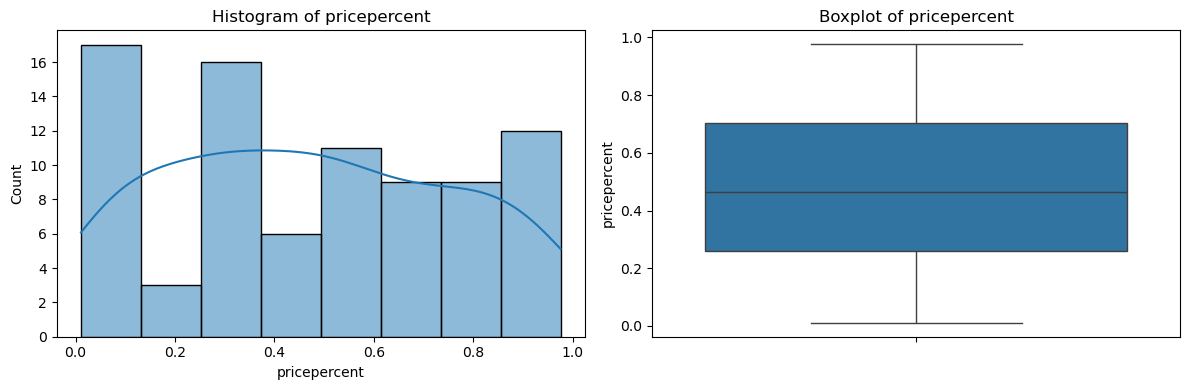

winpercent:
Skewness (0.3055500653714541): Right (positively) skewed: More data points on the left, tail extending to the right.
Kurtosis (-0.6320647962927426): Mesokurtic (normal tails): Outliers and peak similar to a normal distribution.


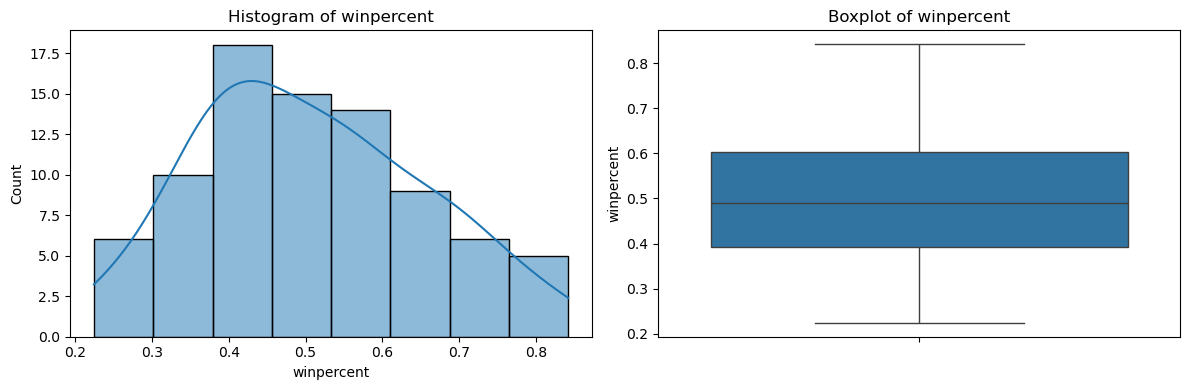

-----


In [10]:
# Lets check the distribution of the numerical features in the dataset.
# Thats quite important since multiple methods require the data to be normally distributed

utils.check_normal_distribution(prepared_data, CANDY_COMPOSITION + CANDY_POPULARITY)
print('-----')
utils.check_skewness_and_kurtosis(prepared_data, CANDY_COMPOSITION + CANDY_POPULARITY)
print('-----')

Thats intersting, while sugarpercent and price percent are not normally distributed, winpercent is. This is important to keep in mind for the analysis.

#### Categorical Features

##### Ingredients

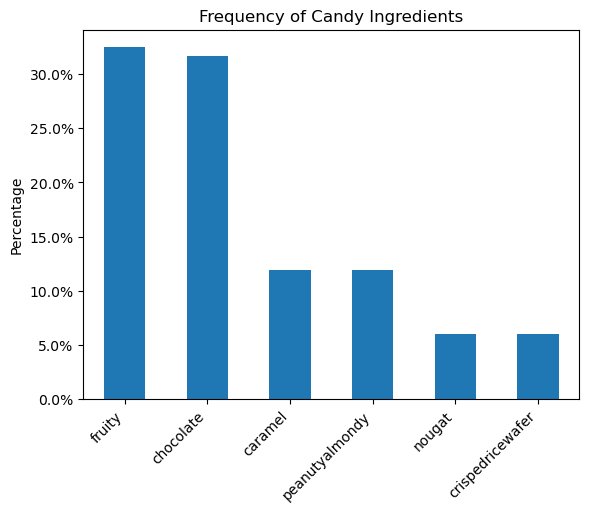

In [11]:
# lets check the frequency of the candy ingredients
utils.plot_frequency(prepared_data, CANDY_INGREDIENTS, 'Candy Ingredients')

We can see a clar trend that most candies contain fruit or chocolate, while the others are less common. This could maybee indicate that fruit and choclate are the base components of most candies while the others are more like add-ons or rather unique ingredients.


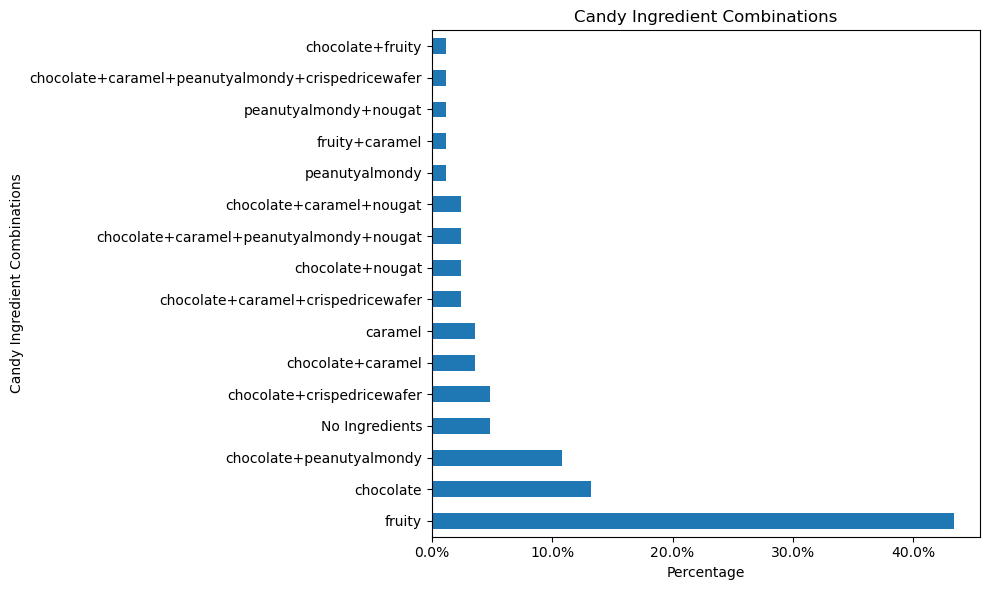

In [12]:
# Thus lets check the frequency of ingredient combinations in the dataset
# to identify the most common combinations and isolate the "true" frequent ones

import pandas as pd
import matplotlib.pyplot as plt

def combo_ingredients(row):
    return '+'.join([feat for feat in CANDY_INGREDIENTS if row[feat] == 1]) or 'No Ingredients'

prepared_data['ingredient_combinations'] = prepared_data.apply(combo_ingredients, axis=1)

utils.plot_frequency_combinations(prepared_data, top_n=None,column='ingredient_combinations', name='Candy Ingredient') # example of how to call the function.


Based on the combined ingredients, we see a slightly differnt picture. Only chocolate, fruity, caramel and "no specific ingredients specifed" appear as base ingredients in the candies. The others are more like add-ons. This is interesting to keep in mind for the analysis. However we cannot determine which ingredients is the main component of the combiation. So for example a candy with chocolate and fruity could be a chocolate candy with fruity flavor or a fruity candy with chocolate flavor.

In [13]:
# Since some candies have None as ingredient we should check them for our understanding

prepared_data[prepared_data['ingredient_combinations'] == 'No Ingredients']



,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,ingredient_combinations
6,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,0.380110,No Ingredients
17,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,0.341590,No Ingredients
46,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,0.377223,No Ingredients
55,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,0.297037,No Ingredients


Lets review the candies without ingredients information to see if we can find a pattern.

- Candy Corn:
    -"Candy corn is a small, pyramid-shaped candy, typically divided into three sections of different colors, with a waxy texture and a flavor based on honey, sugar, butter, and vanilla.[1][2] It is a staple candy of the fall season and Halloween in North America".
    - Source: [Wikipedia](https://en.wikipedia.org/wiki/Candy_corn)
- Haribo Happy Cola:
    - Haribo Happy Cola is a gummy candy made by Haribo. It is in the shape of cola bottles and is flavored with cola.
    - Source: [Haribo](https://www.haribo.com/de-de/produkte/haribo/happy-cola)
- Pixie Sticks:
    - "Pixy Stix are a sweet and sour colored powdered candy usually packaged in a wrapper that resembles a drinking straw."
    - Source: [Wikipedia](https://en.wikipedia.org/wiki/Pixy_Stix)
- Root Beer Barrels:
    - (Shari) Root Beer Barrels. Hard, barrel-shaped candies with a creamy root beer flavor."
    - Source: [my-seet-usa](https://my-sweet-usa.de/products/shari-candies-rootbeer-barrels-128-g?srsltid=AfmBOorvg-UvTi4TKblXDqxpRnSqVo0eNd2XgjAQIlAKY5AdZ4iNlpm5)

Based on this information, we can see that these candies are indeed unique and do not fit neatly into the standard ingredient categories. They represent a diverse range of flavors that are not captured by the existing dataset. However, they do not appear to have ingredients like chocholate but rather use artificial flavors (sugar or acid based) to create their unique taste.

##### Form and Packaging

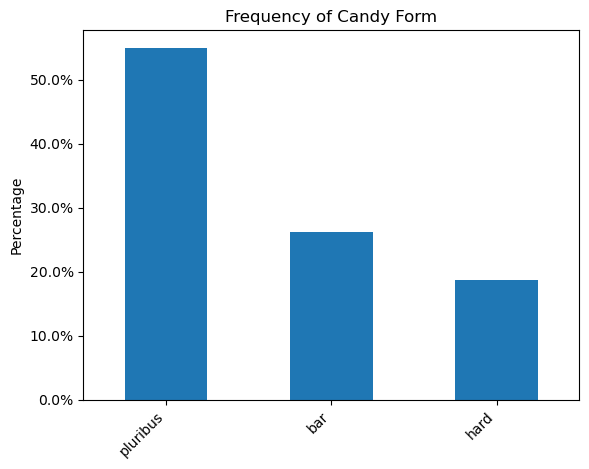

In [14]:
utils.plot_frequency(prepared_data, CANDY_FORM, 'Candy Form')

At a first glance it seems that plurbius (candies in a bag or box) are more often represented in the dataset compared to bars or hard candies. However, i guess that also bars and hard candies can be sold as plurbius. 

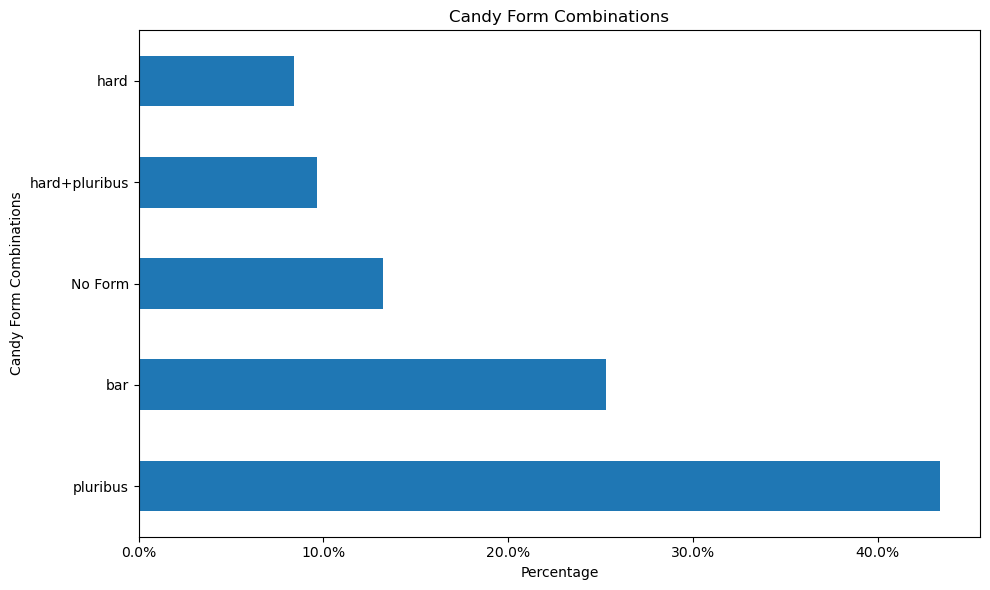

In [15]:
# lets also check the combinations here

def combo_form(row):
    return '+'.join([feat for feat in CANDY_FORM if row[feat] == 1]) or 'No Form'

prepared_data['form_combinations'] = prepared_data.apply(combo_form, axis=1)


utils.plot_frequency_combinations(prepared_data, top_n=None, column='form_combinations', name='Candy Form') # example of how to call the function.

Based on this plot we can see two interesting things. First, there is indeed a combination of hard candies in multi bags and second there are candies without a specified form.
So lets review the candies without a specified form to see if we can find a pattern.

In [16]:
prepared_data[prepared_data['form_combinations'] == 'No Form']

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,ingredient_combinations,form_combinations
2,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0.523415,fruity,No Form
7,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,0.345177,fruity+caramel,No Form
27,Laffy Taffy,0,1,0,0,0,0,0,0,0,0.220,0.116,0.413896,fruity,No Form
29,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,0.529114,fruity,No Form
49,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,0.818663,chocolate+peanutyalmondy,No Form
50,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,0.841803,chocolate+peanutyalmondy,No Form
52,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,0.728879,chocolate+peanutyalmondy,No Form
69,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,0.322310,caramel,No Form
70,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,0.273039,fruity,No Form
73,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511,0.430689,chocolate,No Form


To better understand the dataset and product forms, I researched the following candies and their typical market formats:

**Overview:**

| Product                     | Description & Format                                                                                     |
|-----------------------------|----------------------------------------------------------------------------------------------------------|
| **Air Heads** | Taffy-like chewy candy, individually wrapped strips.                                                      |
| **Caramel Apple Pops** | Fruity lollipops with a caramel shell, individually wrapped.                                              |
| **Laffy Taffy** | Taffy-like chewy candy, individually wrapped (single pieces).                                             |
| **Lifesavers Big Ring Gummies**| Gummy candies, individually wrapped or sold in bags.                                                      |
| **Reese's Miniatures** | Small Reese's peanut butter cups, individually wrapped, sold in bags.                                     |
| **Reese's Peanut Butter Cup**| Original version, sold as singles or in small packs (2–3 cups).                                           |
| **Reese's Stuffed with Pieces**| Peanut butter cups with Reese's Pieces, sold in packs of 2–3 (possibly singles).                         |
| **Sugar Daddy** | Caramel lollipop on a stick, sold individually and in packs.                                              |
| **Super Bubble** | Bubble gum, individually wrapped, sold in bags.                                                           |
| **Tootsie Roll Juniors** | Chewy chocolate-flavored taffy, individually wrapped pieces.                                              |
| **Twizzlers** | Licorice-like candy, generally sold in bags, also available as single sticks.                         |

---

* Many products are individually wrapped. Some are also sold in small bags, raising questions about purchase contexts.
* Reese's Cups and related products appear both as single "cups" and small packs, reflecting multiple forms not explicitly captured.
* Products like Super Bubble and Tootsie Roll Juniors illustrate that bagged (pluribus) items often consist of individually wrapped units, blurring single and pack distinctions.

This review provides additional context, confirming that "no form" classifications often align with individually wrapped or small bagged items.

However, ambiguities remain regarding the precise categorization of packaging forms, particularly distinguishing between individual packaging and other formats.

Based on this information, I would assume products having no form to be no bars, no hard candies, and rather individually wrapped candies. Yet i will not create a new category for this, as this would be pure speculation.

##### Combined Ingredients and Form

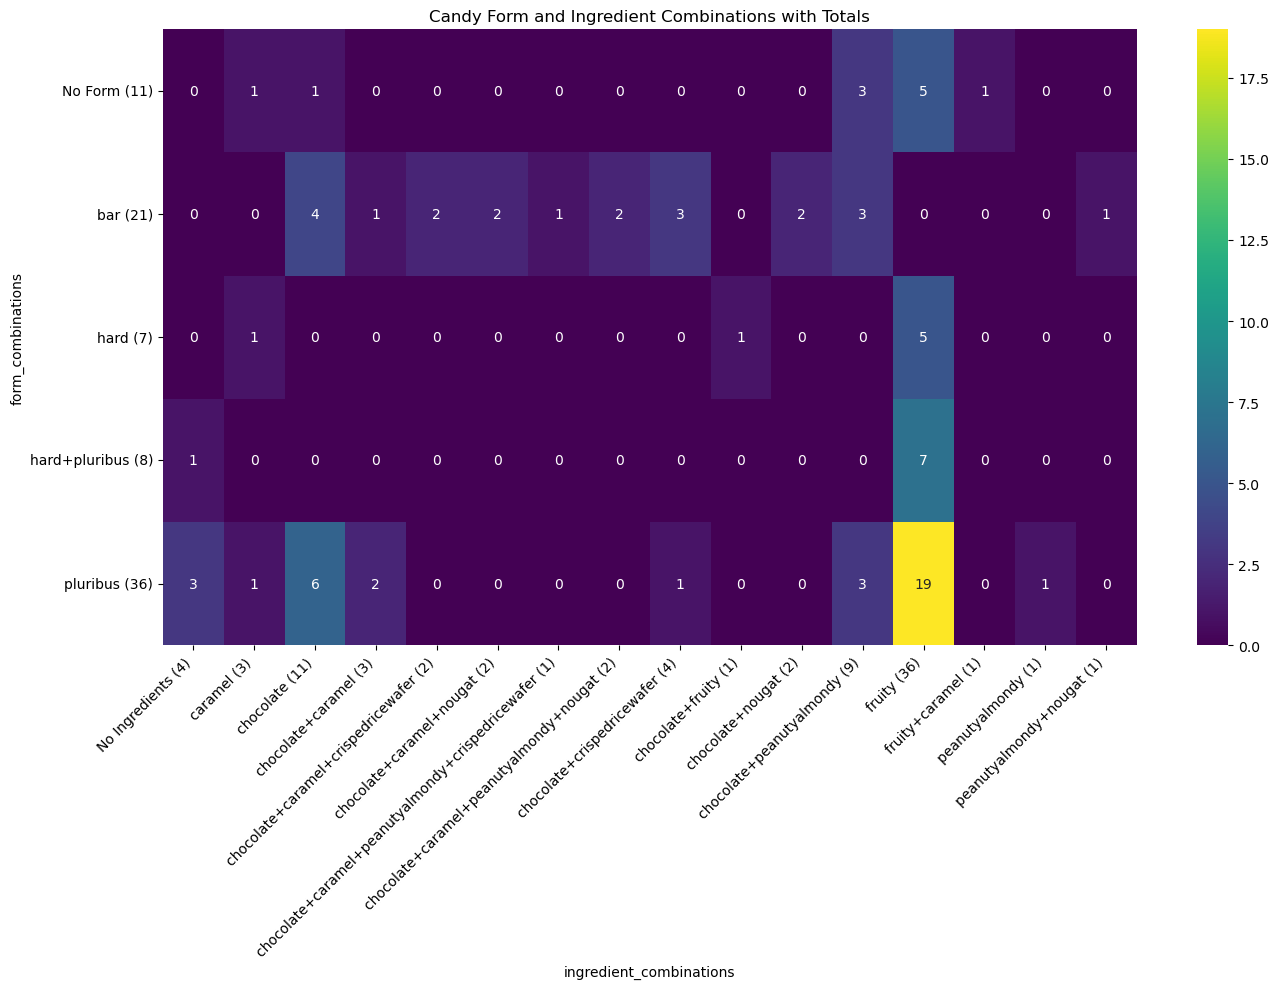

In [17]:
# lets check the frequncy of form combinations and ingredient combinations
utils.plot_form_and_ingredients_heatmap_with_totals(prepared_data)

Intrestingly, we see that fruity candies and chocolate candies are most often sold in a bag or box (pluribus). Whie chocolate / and chocolate based candies are also often sold as a bar. However, fruty candies are not sold as bars. Yet, the combination of fruit and choclate is sold as hard candy. 


#### Summary Data Understanding

**Data Quality**: The dataset contains two control items (One Dime, One Quarter) that are not candies and excluded from the analysis. The remaining candies exhibit a diverse range of ingredients, forms, and packaging styles, with some unique products not fitting standard form and ingredient categories.

**Numerical Features**: 
- **Sugar and Price Distribution**: The sugar and price distributions are not normally distributed, exhibiting a slight right skew (more candies with lower sugar and price values compared to the sugar and prive values in the dataset). 
- **Winpercent Distribution**: The winpercent distribution is approximately normally distributed, with a slightly more pronounced right skew than sugar and price.

**Categorical Features**:
- **Ingredients**: Chocolate and fruity flavors are the most common ingredients in candies, with other ingredients less prevalent. Some candies have unique flavors not captured by the dataset.
- **Form**: Candies are typically sold in bags or boxes (pluribus) or as bars, with hard candies less common. Some candies have no specified form, likely indicating individually wrapped items.
- **Combined Ingredients and Form**: Chocolate candies are often sold as bars or in bags/boxes, while fruity candies are more commonly found in bags/boxes. The combination of fruit and chocolate is typically sold as hard candy.

### In-Depth Analysis


#### Numerical Features Correlation with Winpercent


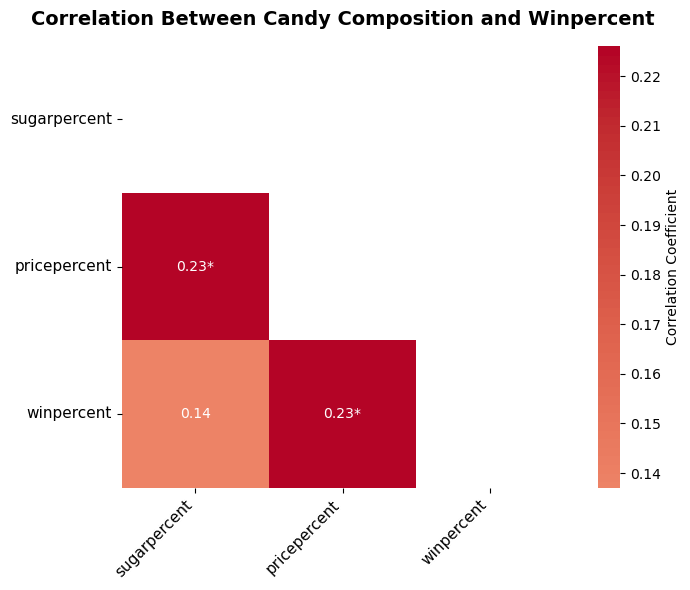

              sugarpercent  pricepercent  winpercent
sugarpercent      1.000000      0.225434    0.137075
pricepercent      0.225434      1.000000    0.226135
winpercent        0.137075      0.226135    1.000000


In [18]:
# Here we need our knowlegde regaridng the normality of these variables
# For correlations pearson assumes normality
# For non-normal variables we can use spearman or kendall
# Since kendall is more robust for smaller sample sizes we will use kendall here
utils.plot_composition_correlation(prepared_data, CANDY_COMPOSITION, method='kendall')

The correlation matrix reveals a statistically significant, albeit weak, positive relationship between sugarpercent, winpercent, and pricepercent. This suggests that candies with higher sugar content and price tend to exhibit a slightly higher win percentage. 

However, the relatively low correlation coefficients indicate that these factors alone do not fully explain candy popularity, and that other variables likely play a substantial role.
Moreover, the low correlation between sugar and winpercent could indicate a potential non-linear relationship or the presence of confounding variables (a third variable that influences both the independent variable and the dependent variable.
) influencing candy popularity.

#### Categorical Features Correlation 

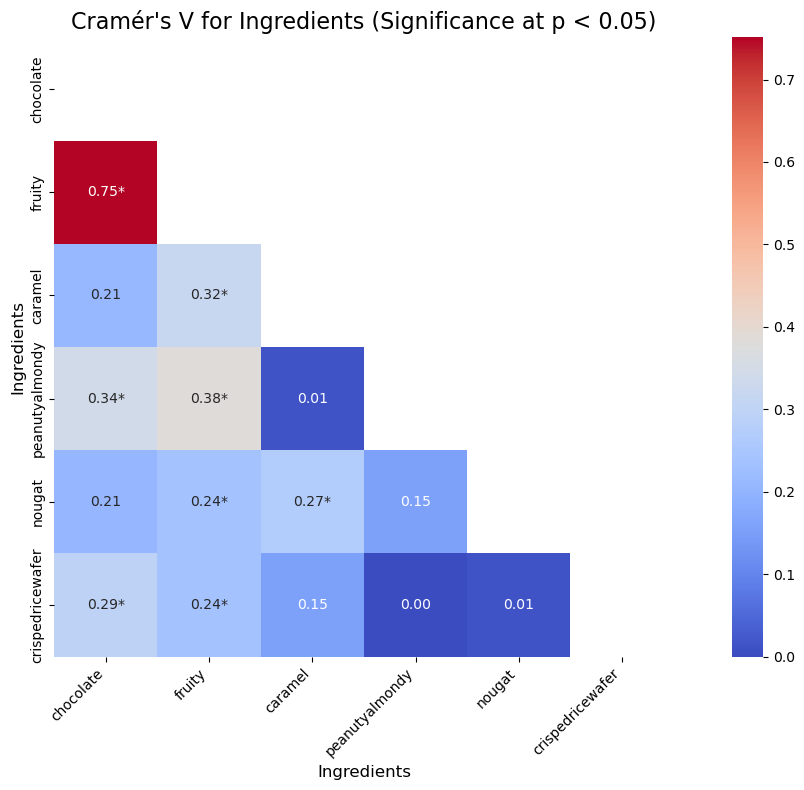

In [19]:
# For the correlation between the ingredients and the form another method is needed
# SIne teh variables are binary, we should use the chi-square statistic
# The chi-square statistic is a measure of association between two categorical variables.
# To obtain a more interpretable measure of association we can use the cramers v statistic
# Cramer's v is a measure of association between two categorical variables, ranging from 0 (no association) to 1 (perfect association).

# Compute Cramér's V matrix with bias correction (as often recommended) 

utils.categorical_corr_with_significance(prepared_data, CANDY_INGREDIENTS, CANDY_INGREDIENTS)

In [20]:
# significant correlations are found between the ingredients
# Chocolate and fruity 
# Chocolate and Peanutyalmondy
# Chocolate and Crispedricewafer
# Fruity and Caramel
# Fruity and Peanutyalmondy
# Fruity and Nougat
# Fruity and Crispedricewafer
# Caramel and nougat

In [21]:
def cross_tab_significance_test(data, column1, column2):
    return pd.crosstab(data[column1], data[column2])

for combination in [('chocolate', 'fruity'), ('chocolate', 'peanutyalmondy'), ('chocolate', 'crispedricewafer'), ('fruity', 'caramel'), ('fruity', 'peanutyalmondy'), ('fruity', 'nougat'), ('fruity', 'crispedricewafer'), ('caramel', 'nougat')]:
    print(f'Cross Tab for {combination}')
    print(cross_tab_significance_test(prepared_data, combination[0], combination[1]))
    print('-----')

Cross Tab for ('chocolate', 'fruity')
fruity      0   1
chocolate        
0           9  37
1          36   1
-----
Cross Tab for ('chocolate', 'peanutyalmondy')
peanutyalmondy   0   1
chocolate             
0               44   2
1               25  12
-----
Cross Tab for ('chocolate', 'crispedricewafer')
crispedricewafer   0  1
chocolate              
0                 46  0
1                 30  7
-----
Cross Tab for ('fruity', 'caramel')
caramel   0   1
fruity         
0        32  13
1        37   1
-----
Cross Tab for ('fruity', 'peanutyalmondy')
peanutyalmondy   0   1
fruity                
0               31  14
1               38   0
-----
Cross Tab for ('fruity', 'nougat')
nougat   0  1
fruity       
0       38  7
1       38  0
-----
Cross Tab for ('fruity', 'crispedricewafer')
crispedricewafer   0  1
fruity                 
0                 38  7
1                 38  0
-----
Cross Tab for ('caramel', 'nougat')
nougat    0  1
caramel       
0        66  3
1        10  4
---

Overall, the Cramer's V analysis reveals a strong association between "chocolate" and "fruity." This indicates that the presence of one ingredient is strongly related to the presence or absence of the other in most cases. However, the actual combination of these ingredients is rare, occurring only once in the dataset. Thus the combination of chocolate and fruity is not a common one.

The same holds true for most other combinations, except for:

- Chocolate and Peanut/Almond (12 common occurrences)
- Chocolate and Crisped Rice/Wafer (7 common occurrences)
- Caramel and Nougat (4 common occurrences)



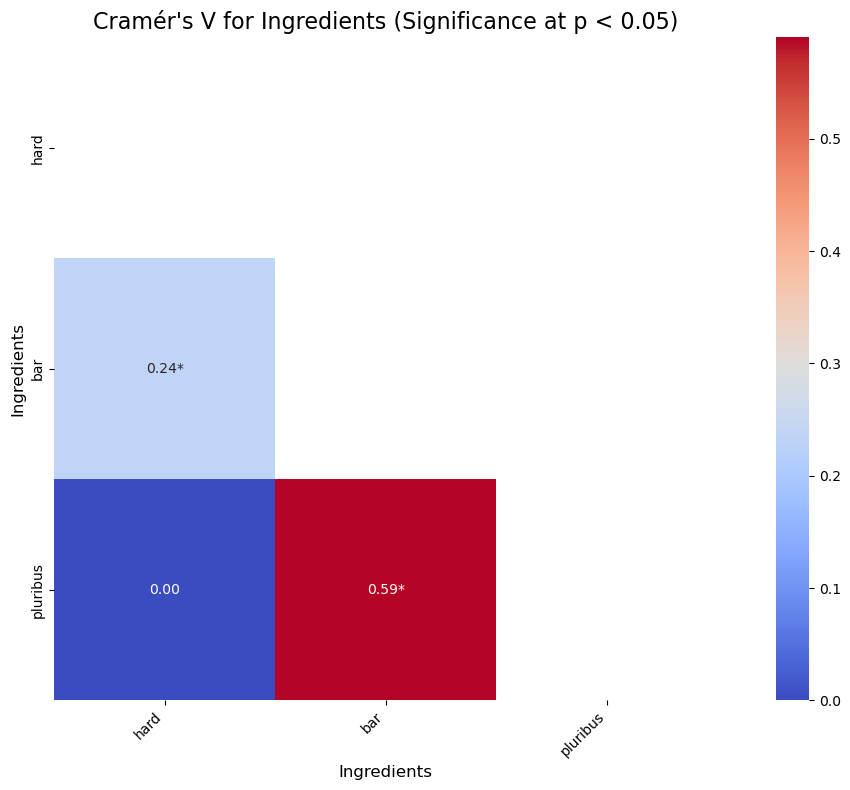

In [22]:
# lets now check the correlations betwwen the form. Again we will use the Cramers V statistic
utils.categorical_corr_with_significance(prepared_data, CANDY_FORM, CANDY_FORM)

In [23]:
# significant correlations are found between the form
#- Bar and pluribus
#- Hard and bar

# lets now check the correlations between the form and the ingredients
for combination in [('bar', 'hard'), ('bar', 'pluribus'), ('hard', 'pluribus')]:
    print(f'Cross Tab for {combination}')
    print(cross_tab_significance_test(prepared_data, combination[0], combination[1]))
    print('-----')

Cross Tab for ('bar', 'hard')
hard   0   1
bar         
0     47  15
1     21   0
-----
Cross Tab for ('bar', 'pluribus')
pluribus   0   1
bar             
0         18  44
1         21   0
-----
Cross Tab for ('hard', 'pluribus')
pluribus   0   1
hard            
0         32  36
1          7   8
-----


We see that these combinations are not very comman since they do not appear together. Thus we can note that Bars are sold as single items, and not in bulk. 
However, for the comination of hard and pluribus we see that there is no association.

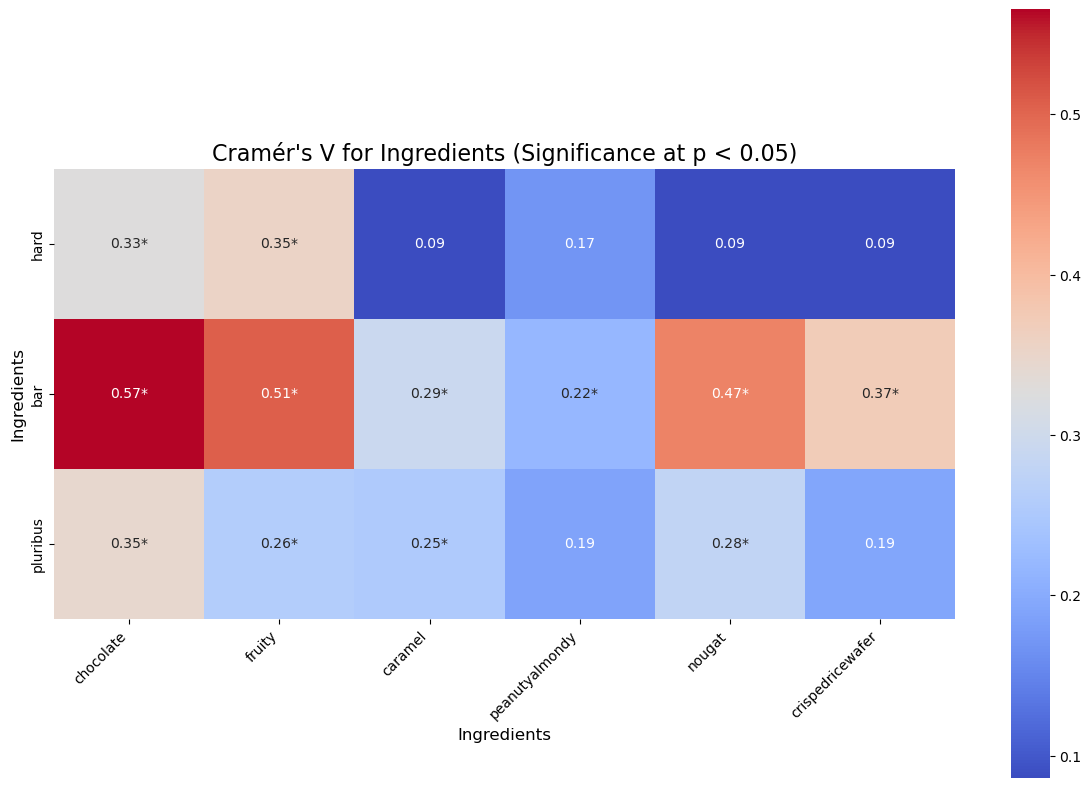

In [24]:
# finally lets check the correlation between form and Ingredients

utils.categorical_corr_with_significance(prepared_data,  CANDY_FORM,CANDY_INGREDIENTS, mask=False)

In [25]:
# significant correlations are found between the form and the ingredients
# Hard and Chocolate
# Hard and Fruity
# Bar and Chocolate
# Bar and Fruity
# Bar and Caramel
# Bar and Peanutyalmondy
# Bar and Nougat
# Bar and Crispedricewafer
# Pluribus and Chocolate
# Pluribus and Fruity
# Pluribus and Caramel
# Pluribus and Nougat

# lets again check the occurances
for combination in [('hard', 'chocolate'), ('hard', 'fruity'), ('bar', 'chocolate'), ('bar', 'fruity'), ('bar', 'caramel'), ('bar', 'peanutyalmondy'), ('bar', 'nougat'), ('bar', 'crispedricewafer'), ('pluribus', 'chocolate'), ('pluribus', 'fruity'), ('pluribus', 'caramel'), ('pluribus', 'nougat')]:
    print(f'Cross Tab for {combination}')
    print(cross_tab_significance_test(prepared_data, combination[0], combination[1]))
    print('-----')

Cross Tab for ('hard', 'chocolate')
chocolate   0   1
hard             
0          32  36
1          14   1
-----
Cross Tab for ('hard', 'fruity')
fruity   0   1
hard          
0       43  25
1        2  13
-----
Cross Tab for ('bar', 'chocolate')
chocolate   0   1
bar              
0          45  17
1           1  20
-----
Cross Tab for ('bar', 'fruity')
fruity   0   1
bar           
0       24  38
1       21   0
-----
Cross Tab for ('bar', 'caramel')
caramel   0  1
bar           
0        56  6
1        13  8
-----
Cross Tab for ('bar', 'peanutyalmondy')
peanutyalmondy   0  1
bar                  
0               55  7
1               14  7
-----
Cross Tab for ('bar', 'nougat')
nougat   0  1
bar          
0       62  0
1       14  7
-----
Cross Tab for ('bar', 'crispedricewafer')
crispedricewafer   0  1
bar                    
0                 61  1
1                 15  6
-----
Cross Tab for ('pluribus', 'chocolate')
chocolate   0   1
pluribus         
0          14  25
1          

Here we obersve lots of signifcant correlation. As a general trend we can take away that:
- Hard Candies: Primarily associated with fruity flavors.
- Bars: Strongly associated with chocolate, caramel, peanut/almond, nougat, and crisped rice/wafer. Not associated with fruit.
- Pluribus: Strongly associated with chocolate, fruit, and caramel. Not associated with nougat.

#### Statistical influence of ingredients on winpercent

Since we've established that the winpercent variable itself is normally distributed, and we are comparing the means of winpercent between two groups (candies with and without a specific ingredient), we can use a t-test to check for the statistical significance of the ingredient's effect on winpercent.'

/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:524: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:538: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(formatted_labels, fontsize=12)
/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:539: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(formatted_labels, fontsize=12)  # Fix: make them visible on right plot too


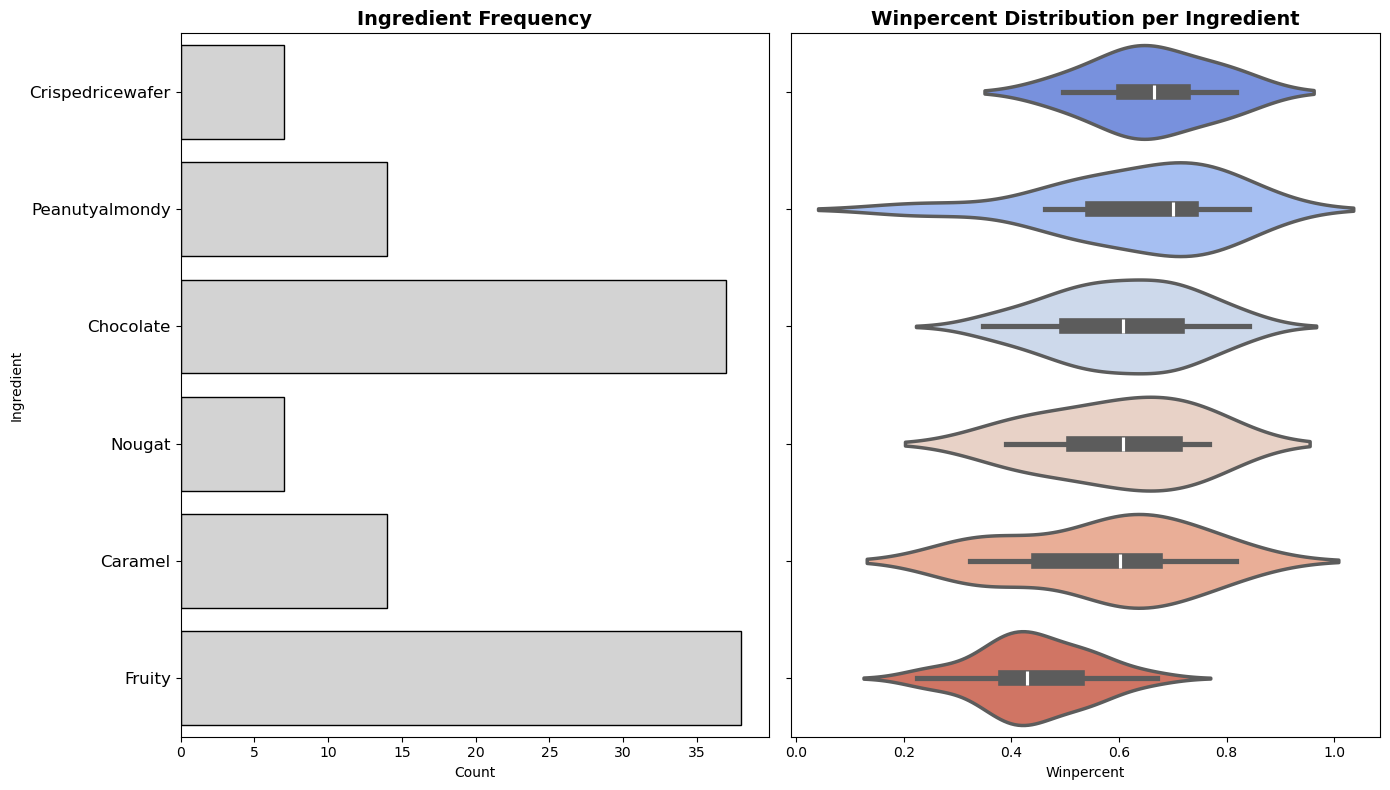

,ingredient,significant,effect size,sample_size_with,sample_size_without,p_value,method,normal_dist (both),p_value_corrected,significant_corrected
0,chocolate,True,1.533,37,42,3.508445e-09,t-test,True,2.105067e-08,True
1,fruity,True,-1.088,38,41,6.623767e-06,t-test,True,3.311884e-05,True
2,caramel,False,0.478,14,65,1.381084e-01,t-test,True,2.504117e-01,False
3,peanutyalmondy,True,1.015,14,65,5.244309e-03,t-test,True,2.097724e-02,True
4,nougat,False,0.670,7,72,1.252058e-01,t-test,True,2.504117e-01,False
5,crispedricewafer,True,1.288,7,72,5.745823e-03,t-test,True,2.097724e-02,True


In [26]:
# However some candies do not have any ingredients which could disort the statistics, thus we should exclude them from this analysis
prepared_data_with_ingredients = prepared_data[prepared_data['ingredient_combinations'] != 'No Ingredients']

utils.plot_frequency_vs_winpercent_box(prepared_data_with_ingredients, CANDY_INGREDIENTS, figsize=(14, 8))
utils.calculate_significance_with_tests(prepared_data_with_ingredients, CANDY_INGREDIENTS)

Statistical testing confirms that chocolate, PeanutyAlmond, and CrispedRiceWafer are key ingredients for a successful candy, each showing substantial effect sizes and strong significance. Interestingly, fruity flavors are significantly associated with lower popularity, suggesting caution when including them. Caramel and nougat did not show significant influence on popularity.

However, since the sample size for Crisped Rice/Wafer and nougat is small, we should be careful with the interpretation of the results.

/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:703: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([combo.capitalize() for combo in sorted_combinations], fontsize=12)
/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:704: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([combo.capitalize() for combo in sorted_combinations], fontsize=12)


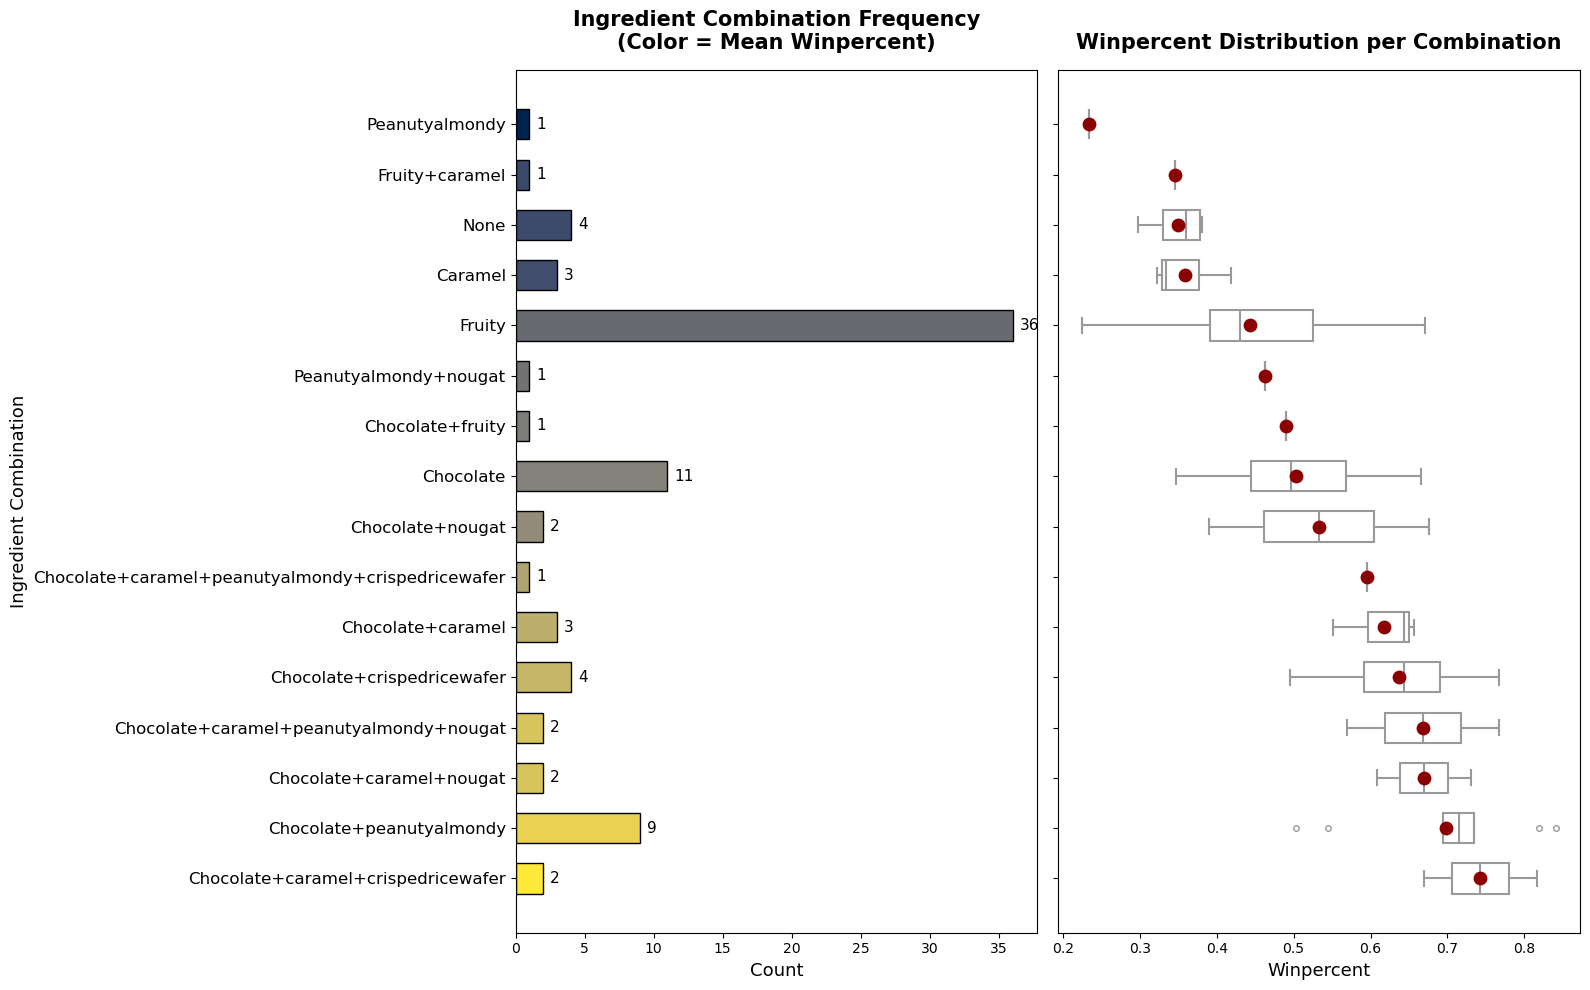

,combination,significant,effect size,sample_size_with,sample_size_without,p_value,method,normal_dist (both),effect_direction,p_value_corrected,significant_corrected
6,None,True,-1.537,4,79,0.000133,t-test,True,Without > With,0.000928,True
2,fruity,True,-0.836,36,47,0.000217,t-test,True,Without > With,0.001301,True
3,chocolate+peanutyalmondy,True,1.758,9,74,0.000221,t-test,True,With > Without,0.001301,True
14,caramel,True,-1.382,3,80,0.017242,t-test,True,Without > With,0.068970,False
10,chocolate+caramel,False,1.025,3,80,0.051445,t-test,True,With > Without,0.154335,False
9,chocolate+crispedricewafer,False,1.059,4,79,0.086523,t-test,True,With > Without,0.173045,False
8,chocolate,False,-0.021,11,72,0.936624,t-test,True,Without > With,0.936624,False
0,chocolate+caramel+crispedricewafer,False,NaN,2,81,NaN,Too small sample,False,Neutral,NaN,False
1,chocolate+nougat,False,NaN,2,81,NaN,Too small sample,False,Neutral,NaN,False
4,chocolate+caramel+peanutyalmondy+nougat,False,NaN,2,81,NaN,Too small sample,False,Neutral,NaN,False


In [27]:
# lets now check if this holds true when considering the combinations of ingredients 
# here we can stick with  the data containing no ingridients, since we group them respectively
utils.plot_combination_frequency_vs_winpercent_box(prepared_data, CANDY_INGREDIENTS)

utils.calculate_combination_significance(prepared_data, CANDY_INGREDIENTS, drop_na_rows=False)

Here it gets a bit more interesting. While ignoring non-significant results, we can see that:

- Candies without ingredients have a statistically significant negative influence on the winpercent.
- Candies only based on Fruit have a statistically significant negative influence on the winpercent.
- Candies with only caramel have a statistically significant negative influence on the winpercent.

- Only chocolate and Peanut/Almond have a statistically significant positive influence on the winpercent.

But the most interesting part is that chocolate alone no longer has a significant effect, indicating that it is the combination of chocolate and Peanut/Almond that makes a candy popular. This is also supported by the correlation analysis.

/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:524: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:538: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(formatted_labels, fontsize=12)
/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:539: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(formatted_labels, fontsize=12)  # Fix: make them visible on right plot too


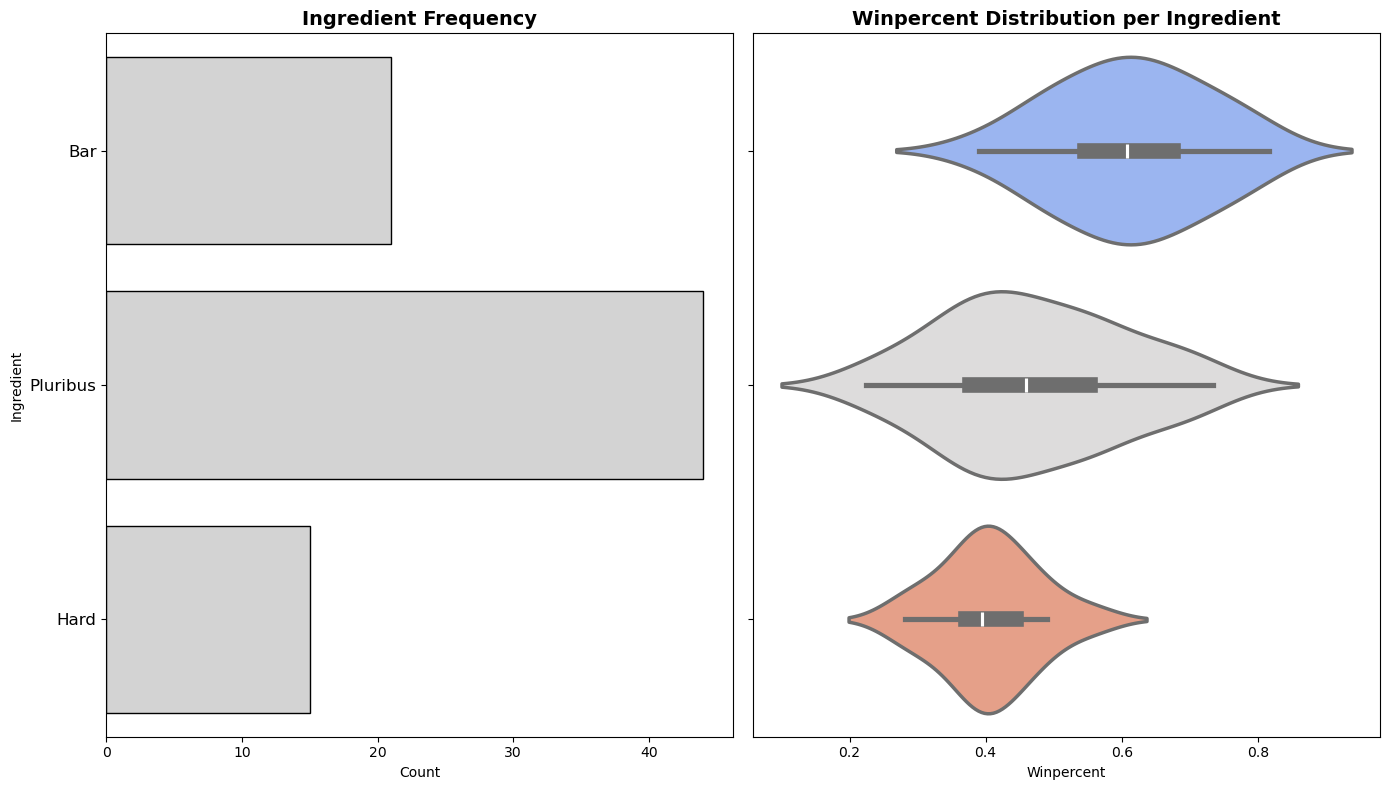

,ingredient,significant,effect size,sample_size_with,sample_size_without,p_value,method,normal_dist (both),p_value_corrected,significant_corrected
0,hard,True,-1.113,15,57,0.000020,t-test,True,0.000039,True
1,bar,True,1.291,21,51,0.000007,t-test,True,0.000022,True
2,pluribus,True,-0.693,44,28,0.005871,t-test,True,0.005871,True


In [28]:
# next we will check the form. 
# however since 11 candies have no form information we need to exclude them from the analysis

prepared_data_with_form = prepared_data[prepared_data['form_combinations'] != 'No Form']
utils.plot_frequency_vs_winpercent_box(prepared_data_with_form, CANDY_FORM, figsize=(14, 8))
utils.calculate_significance_with_tests(prepared_data_with_form, CANDY_FORM)

Our analysis reveals a significant negative association between hard and pluribus candies and popularity, and a significant positive association between bar candies and popularity

/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:703: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([combo.capitalize() for combo in sorted_combinations], fontsize=12)
/Users/marcoroder/Documents/Arbeit/Bewerbungen/Lidl/Case Study/src/utils.py:704: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([combo.capitalize() for combo in sorted_combinations], fontsize=12)


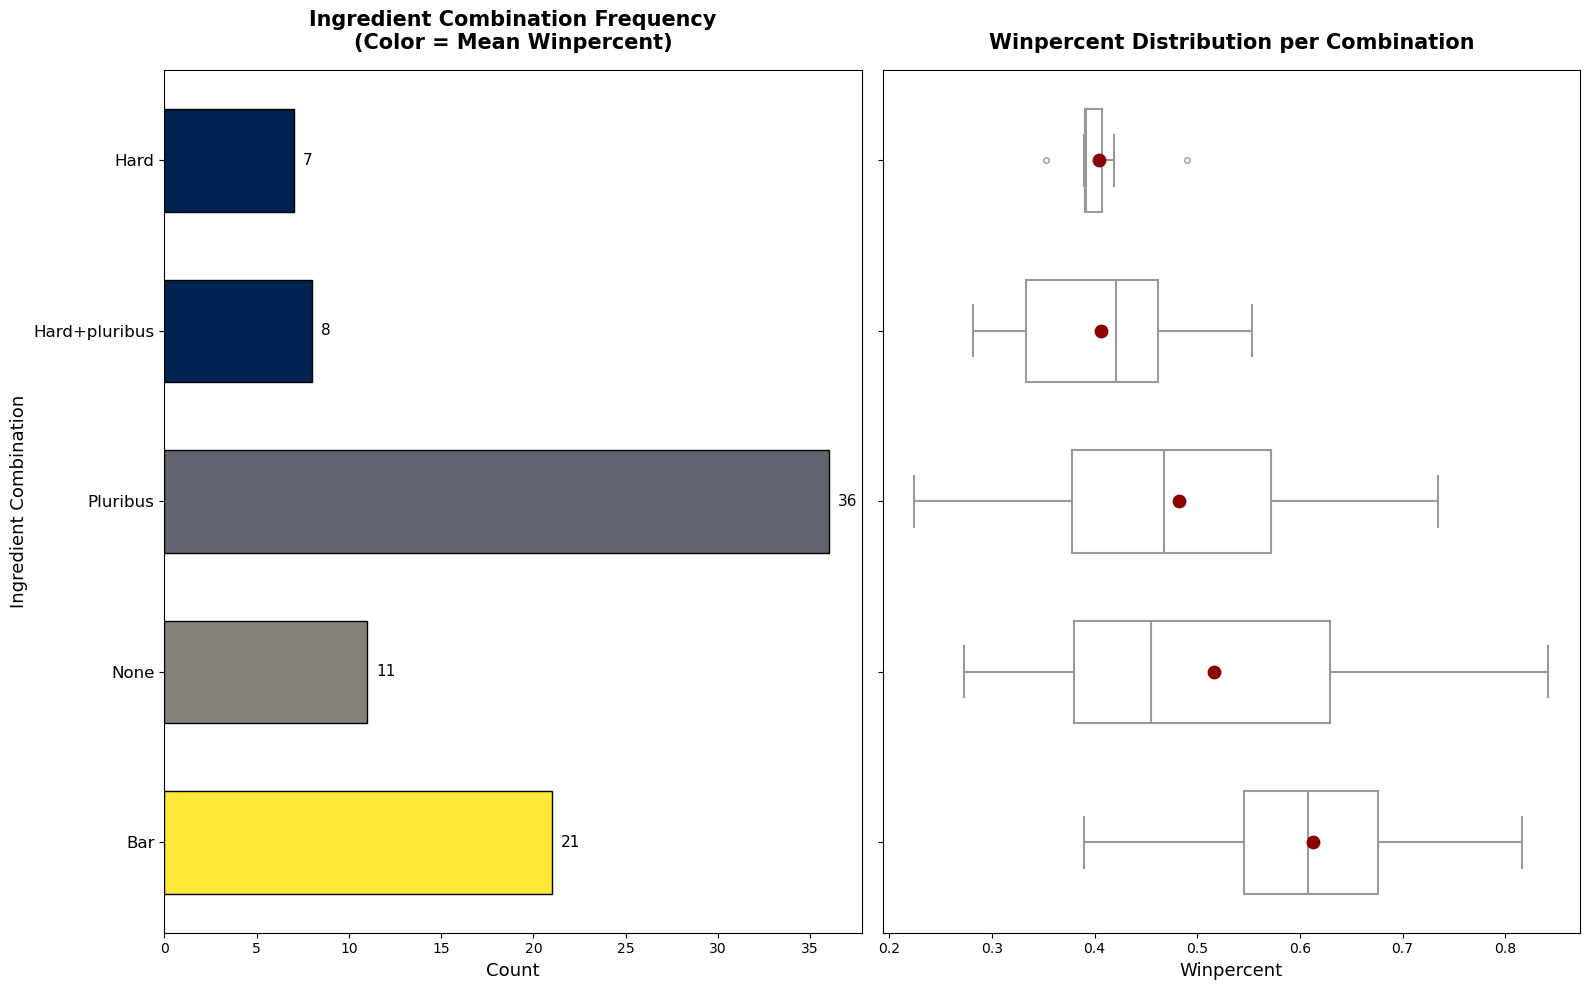

,combination,significant,effect size,sample_size_with,sample_size_without,p_value,method,normal_dist (both),effect_direction,p_value_corrected,significant_corrected
0,bar,True,-0.587,21,62,0.000064,Mann-Whitney U,False,Without > With,0.000322,True
3,hard,True,-1.005,7,76,0.000077,t-test,True,Without > With,0.000322,True
4,hard+pluribus,True,-0.894,8,75,0.011916,t-test,True,Without > With,0.035747,True
2,pluribus,False,-0.288,36,47,0.194292,t-test,True,Without > With,0.388584,False
1,None,False,0.072,11,72,0.845830,t-test,True,With > Without,0.845830,False


In [29]:
# lets now check the combinations of forms
#To explore the combined effects of candy forms on popularity, we analyzed combinations of the 'hard', 'bar', and 'pluribus' forms, including candies with no specified form. 
# The 'no form' category was included to provide a comprehensive analysis. 

utils.plot_combination_frequency_vs_winpercent_box(prepared_data, CANDY_FORM)
utils.calculate_combination_significance(prepared_data, CANDY_FORM, drop_na_rows=False)

Here we again got an interesting finding. When the "no form" category is excluded, we see that:

- Bars are no longer normally distributed but have a significant negative influence on the winpercent (rank-biserial correlation coefficient).
- Hard candies and Hard + Pluribus candies have a significant negative influence on the winpercent.
- Pluribus and candies with no form have no significant effect on the winpercent.

**Note:** Since the bar / non-bar groups are not normally distributed, we used the Mann-Whitney U test to compare their winpercent values.

These results could mean that the popularity of a candy is dramatically influenced by the ingredients, potentially more so than its form. The initial positive association between bar and winpercent may be due to other factors that were removed when excluding the "no form" categories.


**NOTE:** To ensure the validity of our t-test, we exclude the 'no ingredients' / 'no form' groups from the individual ingredient / form analysis. 


## Summary: Key Findings on Candy Popularity

Our in-depth analysis revealed the following key insights:

**1. Ingredient Dominance:**

* **Core Popular Ingredients:** Chocolate, particularly when combined with peanut/almond, significantly boosts candy popularity.
* **Declining Popularity:** Fruity flavors have a notable negative impact, indicating lower consumer preference.
* **Neutral Ingredients:** Caramel and nougat do not significantly influence popularity.
* **Potential Positive:** Crisped rice/wafer shows a positive impact, but requires further validation due to a small sample size.
* **Impact of Combinations:** Chocolate alone has no significant impact, but chocolate combined with peanut/almond does.
* **Negative Impact of Specific Ingredient Categories:** Candies with no ingredients, candies that only consist of fruit, and candies that only consist of caramel have a negative impact on winpercent.

**2. Compositional Factors:**

* **Weak Positive Correlation:** Sugar content and price exhibit a statistically significant, though weak, positive correlation with popularity. This suggests that sweeter and higher-priced candies tend to be slightly more popular, but other factors are more influential.

**3. Form and Packaging Influence:**

* **Variable Impact of Bars:** Initially, bar candies showed a positive correlation with popularity. However, this effect diminished and became negative when candies with "no form" were excluded, suggesting that the form itself may be less critical than ingredients.
* **Negative Impact of Hard Candies and Pluribus:** Hard candies, and hard + pluribus combinations, consistently show a negative correlation with popularity.
* **Insignificant Impact of No Form and Pluribus:** Pluribus and candies with no form have no significant effect on the winpercent.
* **Sample Size Caution:** Be cautious when interpreting results in categories with small sample sizes.

### Modeling


This section builds Ordinary Least Squares (OLS) regression models to analyze the relationship between candy characteristics (ingredients, form, sugar content, price) and popularity (winpercent). The goal is to identify and quantify the factors influencing candy popularity, including potential non-linear effects.

OLS regression is chosen for its transparency, interpretability, and suitability for our dataset.

**Note**: Since our overal goal is to identify the key characteristics of a popular candy, we will exclude the price of the candy from the analysis. This is because the price is not a designable characteristic of the candy and is often determined by external factors such as production costs, market competition, and retailer pricing strategies. We will focus on intrinsic, designable characteristics such as ingredients, form, and sugar content.

However, to ensure the robustness of our analysis we will controll our final model for the influence of price.

#### 4.1. OLS Regression Overview

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon $$

Where:
- $ Y $ is winpercent.
- $ \beta_0 $ is the intercept.
- $ \beta_1, \beta_2, ..., \beta_n $ are feature coefficients.
- $ \epsilon $ is the error term.

#### 4.2. Modeling Strategy

We will build the following OLS models, excluding candies without ingredient or form data to focus on intrinsic, designable characteristics.

**Models:**

1. **Control Model:** Basic model only containing control variables (Form and Sugar).
2. **Ingredients Model:** Model including all ingredient variables and control variables.
3. **Non-Linear Model:** Model with quadratic terms for sugar to capture potential non-linear effects. Further includes the variables form the Ingredients model but without sugar.
4. **Interaction Model:** Non-Linear Model with interatcion terms for Ingredients.

Further Models to verify non-linear effects:

5. **Cubic Model:** Model with cubic terms for sugar to capture potential non-linear effects. Further includes the variables form the Interaction Model.
6. **Linear Model:** Model with linear terms for sugar to capture potential non-linear effects. Further includes the variables form the Interaction Model.


**Rationale for Quadratic Terms:**

* **Inverted-U Effect:** To test for a potential inverted-U shaped relationship between sugar/price and popularity, we will include quadratic terms (sugar_percent^2).
* **Diminishing Returns:** This will allow us to capture potential diminishing returns or negative effects at very high or very low levels of sugar/price.


## OLS Model Summary Metrics

| Metric                | Description                                                                  | Interpretation                                            |
|-----------------------|------------------------------------------------------------------------------|---------------------------------------------------------|
| R-squared             | Variance explained by predictors.                                             | Higher is better.                                        |
| Adjusted R-squared    | R-squared adjusted for predictors.                                           | Higher is better, penalizes complexity.                    |
| F-statistic           | Model significance.                                                           | Higher is better.                                        |
| Prob (F-statistic)    | P-value of F-statistic.                                                       | < 0.05 is significant.                                  |
| AIC/BIC               | Model fit vs. complexity.                                                   | Lower is better.                                        |
| Log-Likelihood        | Model fit likelihood.                                                         | Higher is better.                                        |
| Residual Diagnostics  | Normality, autocorrelation, multicollinearity checks.                     |  |


P_value Correction:
- To account for multiple hypothesis testing, we will apply the fdr_bh correction to our p-values. This will help reduce the likelihood of Type I errors (false positives) when conducting multiple statistical tests.
- I will only apply this to the final model and include the findings into a final recommendation.

In [30]:
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

def p_value_correction(model):
    """
    Applies Benjamini-Hochberg FDR p-value correction to a statsmodels OLS model.

    Args:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): Fitted OLS model.

    Returns:
        numpy.ndarray: Array of corrected p-values.
    """
    if not hasattr(model, 'pvalues'):
        raise ValueError("Model does not have p-values. Ensure the model is fitted.")

    p_values = model.pvalues
    rejected, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

    print("Corrected P-values:")
    for i, name in enumerate(model.pvalues.index):
        print(f"{name}: {p_corrected[i]:.4f} -- original p-value: {p_values[i]:.4f}")

    

    print("\nSignificant Variables (after FDR correction):")
    for i, name in enumerate(model.pvalues.index):
        if rejected[i]:
            print(f"{name}: {p_corrected[i]:.4f}")

    p_corrected_series = pd.Series(p_corrected, index=p_values.index)


    return p_corrected_series

def build_and_visualize_ols(data, formular, p_value_corr=False):
    """
    Builds and visualizes an OLS model, optionally applying p-value correction.

    Args:
        data (pandas.DataFrame): DataFrame containing the data.
        formular (str): OLS formula.
        p_value_corr (bool): Whether to apply p-value correction.

    Returns:
        statsmodels.regression.linear_model.RegressionResultsWrapper: Fitted OLS model.
    """
    model = utils.build_ols_model_formula(data, formular)
    display(model.summary())
    utils.plot_ols_coefficients(model.params, model.pvalues)
    if p_value_corr:
        p_corrected = p_value_correction(model)
        utils.plot_ols_coefficients(model.params, p_corrected)

    return model

In [31]:
# lets first build a set of control variables, which may influence the popularity of the candy but are not the main focus of the analysis
# These variables are the form of the candy and the sugar
# Since we intend to build a private label candy we will exclude the price from the control variables

control_variables = ['hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']

# lets first check for multicollinearity between the control variables
utils.calculate_vif(prepared_data, control_variables)


,feature,VIF,High VIF
0,hard,1.270777,False
1,bar,2.684040,False
2,pluribus,2.399027,False
3,sugarpercent,4.270674,False
4,pricepercent,5.230527,True


##### Control Model

In [32]:
# lets remove price percent from the control variables
control_variables = ['hard', 'bar', 'pluribus', 'sugarpercent']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     12.66
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           5.51e-08
Time:                        21:02:01   Log-Likelihood:                 54.776
No. Observations:                  83   AIC:                            -99.55
Df Residuals:                      78   BIC:                            -87.46
Df Model:                           4                                         
Covariance Type:                  HC3                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4632      0.053      8.675      0.000       0.359       0.568
hard            -0.1005      0.034     -2.952      0.003      -0.167      -0.034
bar              0.0917      0.053      1.715      0.086      -0.013       0.196
pluribus        -0.0307      0.046     -0.666      0.505      -0.121       0.060
sugarpercent     0.1101      0.057      1.937      0.053      -0.001       0.221
==============================================================================
Omnibus:                        1.725   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.598
Skew:                           0.334   Prob(JB):                        0.450
Kurtosis:                       2.879   Cond. No.                         5.82
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

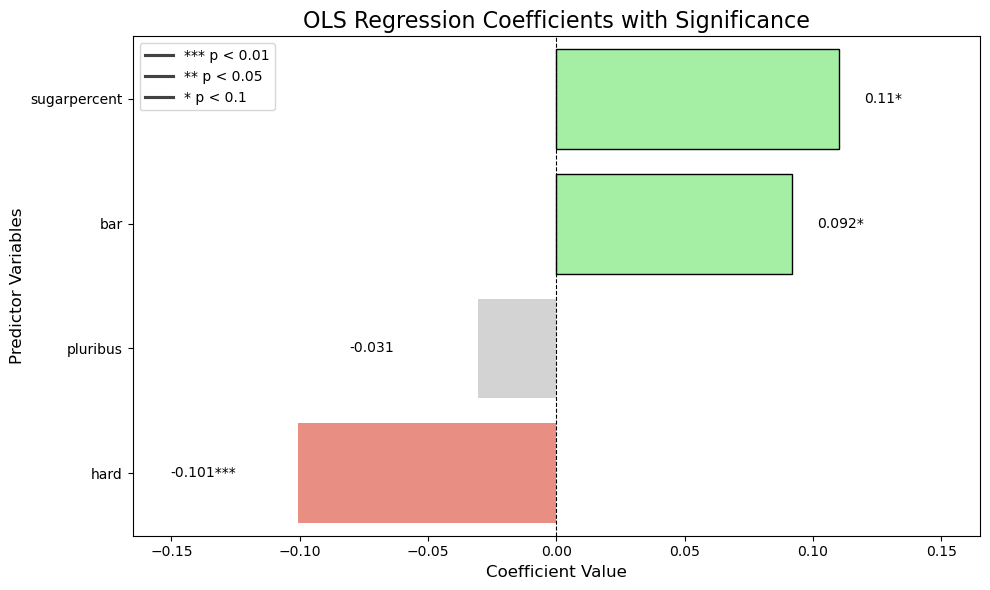

In [33]:
# since the VIF values are below 5 we can proceed with the analysis
# lets build the model and visualize the results
control_formular = ' + '.join(control_variables)

control_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {control_formular}')


We can clearly see that the model is overall significant and explains 27,2 % of the variance in the winpercent. The AIC and BIC are also quite low, indicating a good model fit. The log-likelihood is high, suggesting a good fit as well.
As expected a hard candy has a signfiicant negative influence on the winpercent. 
However a bit unexpected is the marginal significance of the sugarpercent (here we sould later check for non linearity)

#### Ingredients Model

In [34]:
# lets now add the ingredients to the model. 
# first check the VIF values
ingredient_variables = CANDY_INGREDIENTS

utils.calculate_vif(prepared_data, CANDY_INGREDIENTS + control_variables)



,feature,VIF,High VIF
0,chocolate,3.565205,False
1,fruity,2.794098,False
2,caramel,1.560350,False
3,peanutyalmondy,1.495967,False
4,nougat,1.928741,False
5,crispedricewafer,1.690229,False
6,hard,1.515001,False
7,bar,3.951182,False
8,pluribus,2.711400,False
9,sugarpercent,4.183820,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     7.507
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           4.70e-08
Time:                        21:02:01   Log-Likelihood:                 73.337
No. Observations:                  83   AIC:                            -124.7
Df Residuals:                      72   BIC:                            -98.07
Df Model:                          10                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3075      0.053      5.820      0.000       0.204       0.411
chocolate            0.2042      0.045      4.580      0.000       0.117       0.292
fruity               0.1104      0.044      2.533      0.011       0.025       0.196
caramel              0.0244      0.045      0.538      0.591      -0.065       0.113
peanutyalmondy       0.0989      0.050      1.996      0.046       0.002       0.196
nougat               0.0180      0.070      0.257      0.797      -0.119       0.155
crispedricewafer     0.0855      0.075      1.138      0.255      -0.062       0.233
hard                -0.0554      0.031     -1.770      0.077      -0.117       0.006
bar                 -0.0046      0.059     -0.077      0.939      -0.121       0.112
pluribus            -0.0026      0.034     -0.079      0.937      -0.068       0.063
sugarpercent         0.0812      0.049      1.656      0.098      -0.015       0.177
==============================================================================
Omnibus:                        0.626   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.743
Skew:                          -0.098   Prob(JB):                        0.690
Kurtosis:                       2.581   Cond. No.                         9.39
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

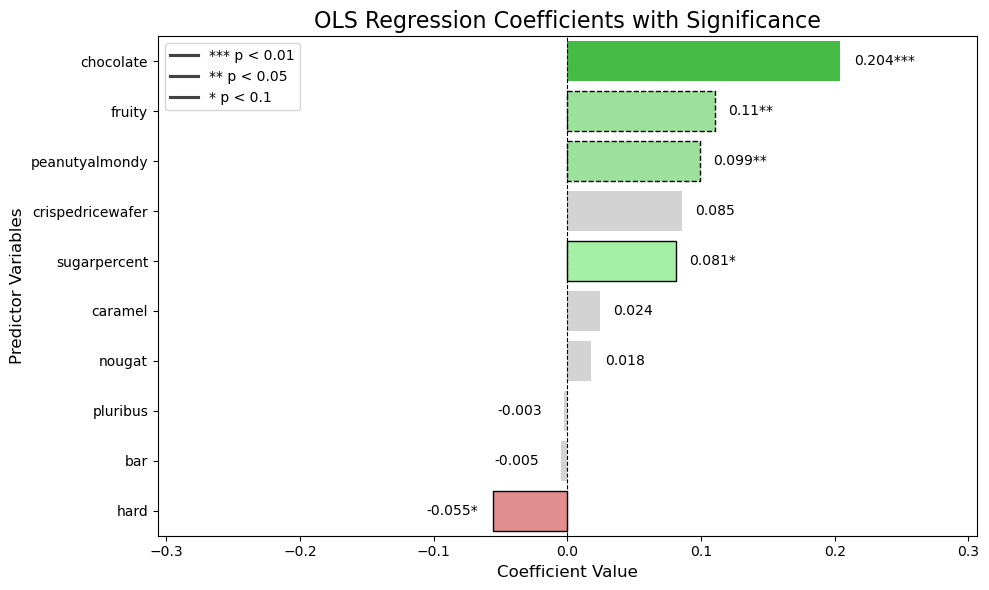

In [35]:
# agin the VIF values are below 5 we can proceed with the analysis
# lets build the model and visualize the results
ingredient_formular = ' + '.join(ingredient_variables)
ingredient_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {ingredient_formular} + {control_formular}')

We can see a dramatic increase in the explained variance of winpercent (53.35 %) and also in the adjusted R2, meaning that the additional features significantly improve the model fit
However, as expected the Ingredients are the most signficant features. Here chocolate, furity and peanutalmondy have a significant positive infuence on the winpercent.

However, after p_value correction, we see that peanutalmondy is no longer significant. This is interesting and could indicate that the effect of peanutalmondy is not as strong as initially thought but may be influenced by other factors.

#### Non-Linear Model (Sugar Quadratic)

In [36]:
# lets now check if there is a perhaps non linear relationship with sugar
# Since we saw that the sugarpercent is significant correlated with the winpercent i would expect a non linear relationship
# For example some U-shaped relationship where a small or large amout of sugar is beneficial for the popularity of the candy
# lets check this with a polynomial regression

# therefore lets calculate the squared sugarpercent
prepared_data['sugarpercent_squared'] = prepared_data['sugarpercent'] ** 2
# i would expect that we need to exclude the sugarpercent from the model since it is highly correlated with the squared sugarpercent
# lets check the VIF values
utils.calculate_vif(prepared_data, CANDY_INGREDIENTS + control_variables + ['sugarpercent_squared'])

# so we need to exclude the sugarpercent from the model
control_variables_without_sugar = control_variables.copy()
control_variables_without_sugar.remove('sugarpercent')



In [37]:
# lets check the vif values again
utils.calculate_vif(prepared_data, CANDY_INGREDIENTS + control_variables_without_sugar + ['sugarpercent_squared'])

,feature,VIF,High VIF
0,chocolate,3.389554,False
1,fruity,2.554710,False
2,caramel,1.530620,False
3,peanutyalmondy,1.473292,False
4,nougat,1.926742,False
5,crispedricewafer,1.689947,False
6,hard,1.491708,False
7,bar,3.880295,False
8,pluribus,2.531544,False
9,sugarpercent_squared,2.341723,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     7.863
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           2.16e-08
Time:                        21:02:02   Log-Likelihood:                 74.059
No. Observations:                  83   AIC:                            -126.1
Df Residuals:                      72   BIC:                            -99.51
Df Model:                          10                                         
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3178      0.049      6.491      0.000       0.222       0.414
chocolate                0.2041      0.044      4.663      0.000       0.118       0.290
fruity                   0.1108      0.043      2.563      0.010       0.026       0.196
caramel                  0.0218      0.046      0.479      0.632      -0.067       0.111
peanutyalmondy           0.0991      0.049      2.040      0.041       0.004       0.194
nougat                   0.0193      0.070      0.274      0.784      -0.119       0.157
crispedricewafer         0.0856      0.077      1.110      0.267      -0.065       0.237
hard                    -0.0563      0.031     -1.814      0.070      -0.117       0.005
bar                      0.0008      0.059      0.013      0.990      -0.114       0.116
pluribus                -0.0033      0.033     -0.102      0.919      -0.067       0.061
sugarpercent_squared     0.0913      0.043      2.133      0.033       0.007       0.175
==============================================================================
Omnibus:                        0.554   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.688
Skew:                          -0.093   Prob(JB):                        0.709
Kurtosis:                       2.595   Cond. No.                         9.05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

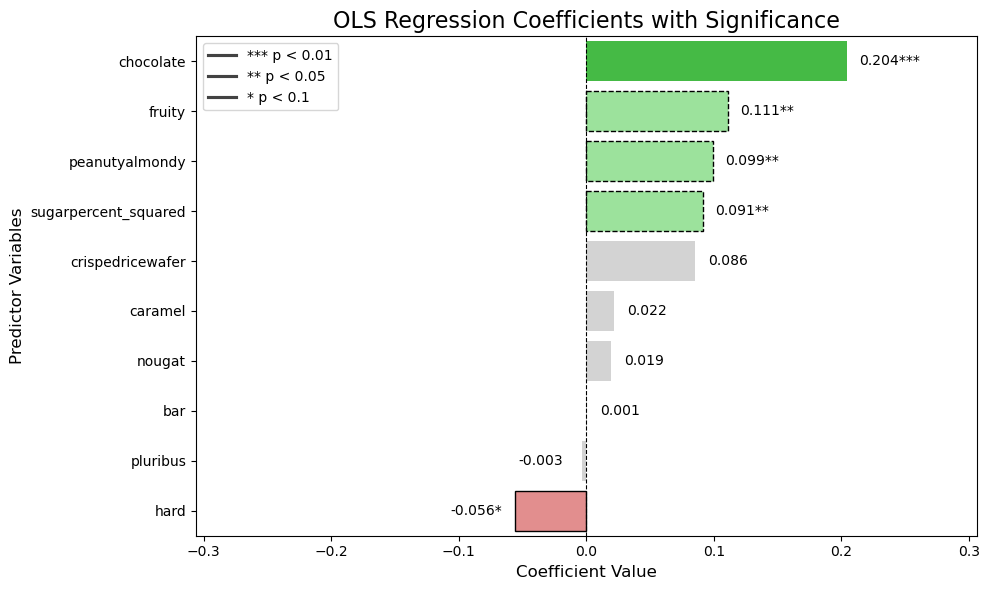

In [38]:
# so we can build the model now

ingredient_formular = ' + '.join(ingredient_variables)
control_formular_without_sugar = ' + '.join(control_variables_without_sugar)
ingredient_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {ingredient_formular} + {control_formular_without_sugar} + sugarpercent_squared')

Interestingly, we observe a significant positive influence of sugarpercent_squared on winpercent. This indicates a non-linear relationship between sugar content and candy popularity. Specifically, it suggests that within the range of sugar percentages observed in our data, higher sugar levels tend to correlate with increased win percentages. However, the squared term implies that the effect of sugar on popularity is not constant; it increases at an increasing rate. This could suggest that there's a point of diminishing returns or even a potential negative impact beyond a certain sugar threshold, although our model does not directly test this. Further research could explore the specific shape of this relationship and identify the optimal sugar range for maximum popularity.

Yet this picture changes again when correcting the p_vale. Here see that sugarpercent_squared and peanutalmondy are only marginally significant. 

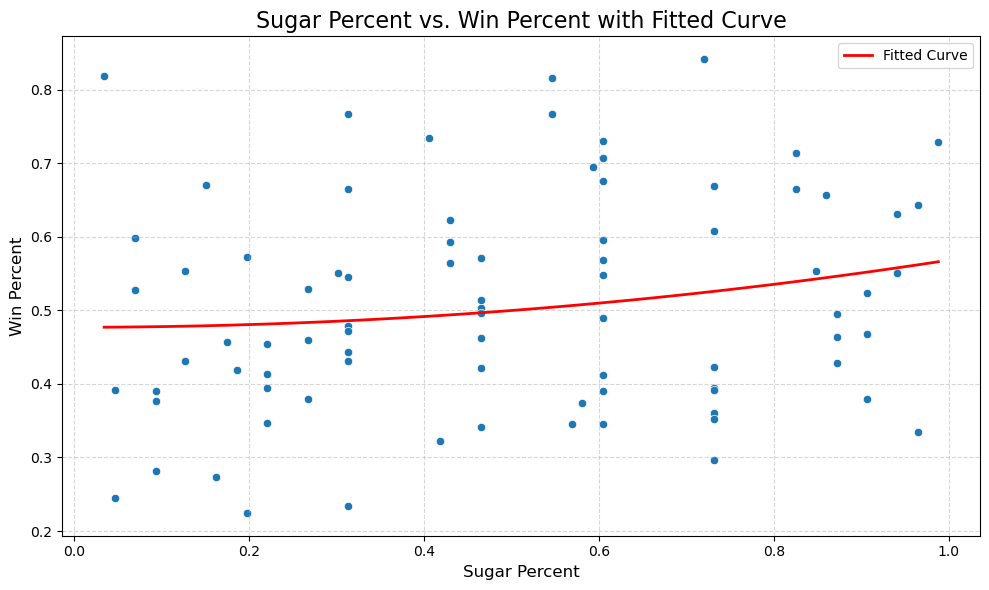

In [39]:
# lets visualize this effect

features = CANDY_INGREDIENTS + control_variables + ['winpercent']
utils.visualize_sugar_effect(prepared_data[features],ingredient_model)

We can clearly see a non-linear relationship between sugar and the popularity of the candy. 
This indicates that a higer sugar percentile has a more pronounced effect on the winpercent than a lower sugar percentile.
Howver since the curve is rather flat, we can assume that the effect of sugar on the winpercent is rather small and customers are not that sensitive to the sugar content of the candy.

However, if a candy with only one ingredients is developed, it should contain chocolate, fruity or peanutalmondy and a higher sugar content to be popular.


#### Interaction Model

In [40]:
# lets now check how this picture changes for a candy with 2 ingredients
# As we saw before the most common combinations are based on chocolate
# moreover i will not check for rather rare combinations like chocolate and fruity

# test the multicollinearity again
prepared_data['chocolate:peanutyalmondy'] = prepared_data['chocolate'] * prepared_data['peanutyalmondy']
# also test chocolate+crispedricewafer
prepared_data['chocolate:crispedricewafer'] = prepared_data['chocolate'] * prepared_data['crispedricewafer']
# also test chocolate+caramel   
prepared_data['chocolate:caramel'] = prepared_data['chocolate'] * prepared_data['caramel']

candy_ingredients_interaction = CANDY_INGREDIENTS + ['chocolate:peanutyalmondy', 'chocolate:crispedricewafer', 'chocolate:caramel']
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + ['sugarpercent_squared'])

# Here we see that those ingredients only beeing presnet together with chocolate introduce multicollinearity
# Thus we need to remove those ingredients that only appear together with chocolate and are part of our interations



/opt/homebrew/Caskroom/mambaforge/base/envs/ml_env/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/homebrew/Caskroom/mambaforge/base/envs/ml_env/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF,High VIF
0,chocolate,4.042265,False
1,fruity,2.630934,False
2,caramel,3.723056,False
3,peanutyalmondy,8.498514,True
4,nougat,2.124098,False
5,crispedricewafer,inf,True
6,chocolate:peanutyalmondy,9.065725,True
7,chocolate:crispedricewafer,inf,True
8,chocolate:caramel,4.290021,False
9,hard,1.505066,False


In [41]:

# now lets remove all ingredients that are in interaction but do not occur alone

candy_ingredients_interaction.remove('nougat')  
candy_ingredients_interaction.remove('crispedricewafer')
# also remove peanutalmondy since it is only onces represented in the dataset also leading to multicollinearity
candy_ingredients_interaction.remove('peanutyalmondy')

# lets check the VIF values again
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + ['sugarpercent_squared'])


,feature,VIF,High VIF
0,chocolate,3.803950,False
1,fruity,2.544573,False
2,caramel,3.721445,False
3,chocolate:peanutyalmondy,1.570037,False
4,chocolate:crispedricewafer,1.405374,False
5,chocolate:caramel,4.077652,False
6,hard,1.503464,False
7,bar,2.891389,False
8,pluribus,2.560231,False
9,sugarpercent_squared,2.345567,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     6.907
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.80e-07
Time:                        21:02:03   Log-Likelihood:                 75.989
No. Observations:                  83   AIC:                            -130.0
Df Residuals:                      72   BIC:                            -103.4
Df Model:                          10                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3686      0.050      7.337      0.000       0.270       0.467
chocolate                      0.1514      0.044      3.434      0.001       0.065       0.238
fruity                         0.0725      0.041      1.790      0.073      -0.007       0.152
caramel                       -0.0455      0.075     -0.606      0.545      -0.193       0.102
chocolate:peanutyalmondy       0.1191      0.052      2.310      0.021       0.018       0.220
chocolate:crispedricewafer     0.0782      0.072      1.085      0.278      -0.063       0.219
chocolate:caramel              0.0908      0.086      1.052      0.293      -0.078       0.260
hard                          -0.0581      0.033     -1.779      0.075      -0.122       0.006
bar                            0.0010      0.050      0.019      0.985      -0.097       0.099
pluribus                      -0.0129      0.032     -0.407      0.684      -0.075       0.049
sugarpercent_squared           0.0842      0.043      1.969      0.049       0.000       0.168
==============================================================================
Omnibus:                        0.420   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.574
Skew:                          -0.035   Prob(JB):                        0.751
Kurtosis:                       2.599   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

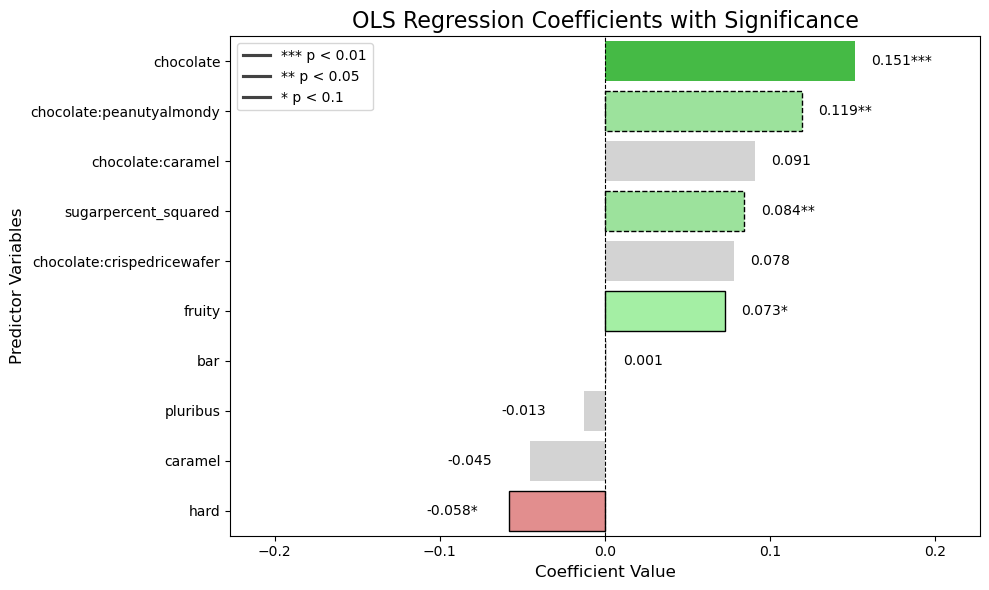

In [42]:
# now we are fine and can build our model
interaction_formular = ' + '.join(candy_ingredients_interaction)
interaction_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {interaction_formular} + {control_formular_without_sugar} + sugarpercent_squared')



### Recommendation

Finally, when taking into account the interaction terms, we see that the interaction between chocolate and peanutalmondy has a significant positive influence on the winpercent. This indicates that a candy containing both chocolate and peanutalmondy is more popular than a candy containing only one of these ingredients. Therefore the popularity of a candy containing both ingredients is higher than the sum of the popularity of the candies containing only one of these ingredients. Thus, when developing a new candy, it should contain both chocolate and peanutalmondy to be popular. 

Moreover, the significant positive interaction between the popularity (winpercent) and sugarpercent_squared indicates that the candy should contain sugar levels towards the higher end of what's typically found in candies to be popular. Next, we see that hard candies are marginally significant and have a negative influence on the winpercent. This indicates that hard candies are less popular than other forms of candies. Thus the candy should not be hard but perhaps a bar or another form. 

The marginal significant positive influence of fruity on the candy popularity is also interesting. This is in line with the current market trends outlined in the beginning of this notebook (Business Understanding) which indicates that some fruity flavors are on the rise. Thus, adding a fruity note to the candy could further increase its popularity. However, since in our data there is only one combination of fruity and chocolate, we cannot give a clear recommendation on this. 

Accounting for the last market trend (healthy, vegan, clean-label) we see an interesting and opposite trend in the data. Here a higher amount of sugar (which could be unhealthy) is related to a higher popularity of the candy. To address the growing trend of healthy and clean-label products, consider designing the candy with vegan ingredients or using natural, minimally processed ingredients. This could further increase the popularity of the candy. While high sugar content is associated with higher popularity, it's important to balance this with the growing demand for healthier options. Consider using natural sweeteners or offering a lower-sugar version of the candy alongside the standard product.

Given the high expectations for quality in private label products, as highlighted in our Business Understanding, we strongly recommend implementing rigorous quality control measures throughout the production process. To effectively address the less pronounced trend of private label adoption in the candy segment, targeted marketing campaigns are crucial. These campaigns should emphasize the superior quality and exceptional value of our private label candy. Furthermore, strategic differentiation through unique offerings, such as an innovative flavor (Chocolate, Peanut/Almondy + Fruit) profile or a distinctive vegan option, could significantly enhance market penetration and customer appeal. However, it is vital to conduct further research to fully understand the appeal of the specific flavor combination of chocolate, peanut/almondy, and fruit before making a definitive product development decision.


### Further Tests on Sugar Content

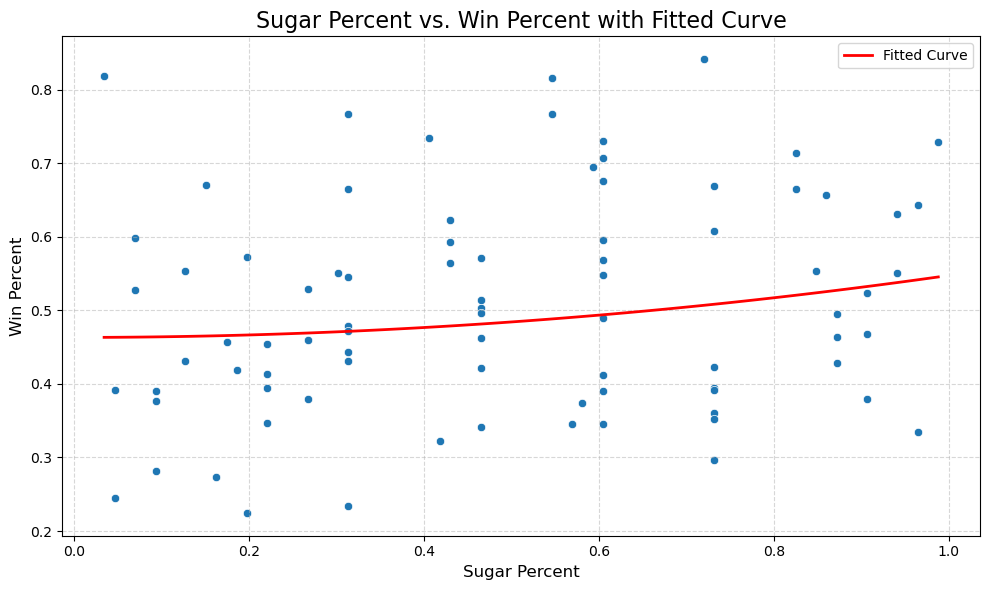

In [43]:
# visualize the effect

features = candy_ingredients_interaction + ['peanutyalmondy', 'crispedricewafer'] + control_variables_without_sugar + ['sugarpercent' ,'winpercent']
utils.visualize_sugar_effect(prepared_data[features],interaction_model, non_linear_col='sugarpercent_squared', non_liner_factor=2)


#### Robustness Check: Non-Linear Effects


In [44]:
# Finally (and optional) lets check if there is a dimishing return effect for the sugar

# threfore we will add a cubic term to the model

prepared_data['sugarpercent_cubed'] = prepared_data['sugarpercent'] ** 3

# lets check the VIF values
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + [ 'sugarpercent_cubed'])


,feature,VIF,High VIF
0,chocolate,3.769356,False
1,fruity,2.495561,False
2,caramel,3.681588,False
3,chocolate:peanutyalmondy,1.561893,False
4,chocolate:crispedricewafer,1.405355,False
5,chocolate:caramel,4.072509,False
6,hard,1.487342,False
7,bar,2.872732,False
8,pluribus,2.507352,False
9,sugarpercent_cubed,1.832491,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     7.192
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           9.45e-08
Time:                        21:02:03   Log-Likelihood:                 76.212
No. Observations:                  83   AIC:                            -130.4
Df Residuals:                      72   BIC:                            -103.8
Df Model:                          10                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3708      0.049      7.559      0.000       0.275       0.467
chocolate                      0.1521      0.043      3.504      0.000       0.067       0.237
fruity                         0.0739      0.039      1.872      0.061      -0.003       0.151
caramel                       -0.0447      0.074     -0.607      0.544      -0.189       0.100
chocolate:peanutyalmondy       0.1203      0.051      2.346      0.019       0.020       0.221
chocolate:crispedricewafer     0.0781      0.072      1.086      0.277      -0.063       0.219
chocolate:caramel              0.0900      0.086      1.050      0.294      -0.078       0.258
hard                          -0.0567      0.032     -1.773      0.076      -0.119       0.006
bar                            0.0056      0.050      0.113      0.910      -0.092       0.104
pluribus                      -0.0124      0.032     -0.390      0.696      -0.074       0.050
sugarpercent_cubed             0.0930      0.042      2.213      0.027       0.011       0.175
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.566
Skew:                          -0.043   Prob(JB):                        0.753
Kurtosis:                       2.604   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

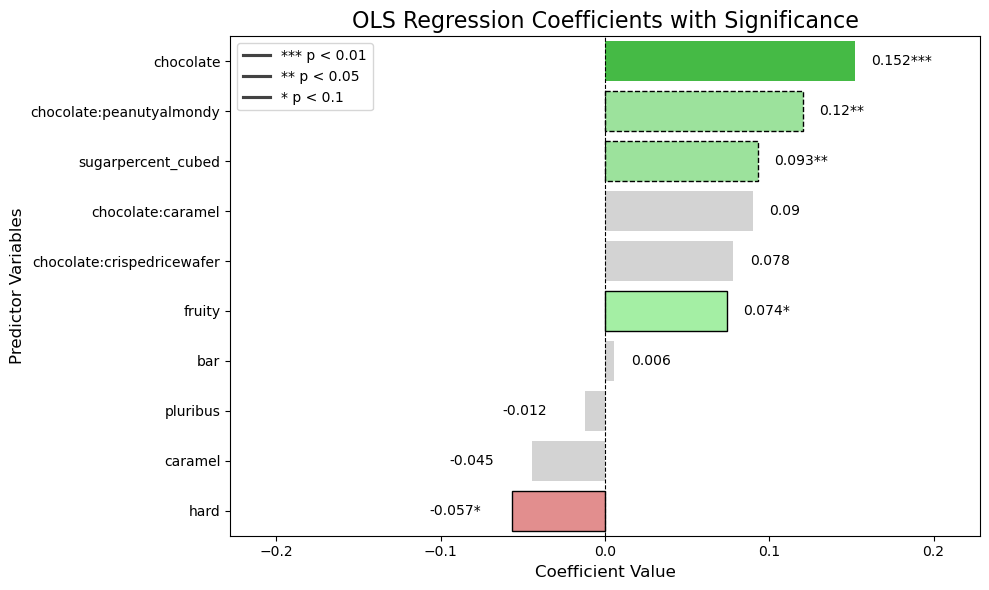

In [45]:
# lets buid the model
cubed_sugar_forumlar = ' + '.join(candy_ingredients_interaction)
cubed_sugar_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {cubed_sugar_forumlar} + {control_formular_without_sugar} + sugarpercent_cubed')

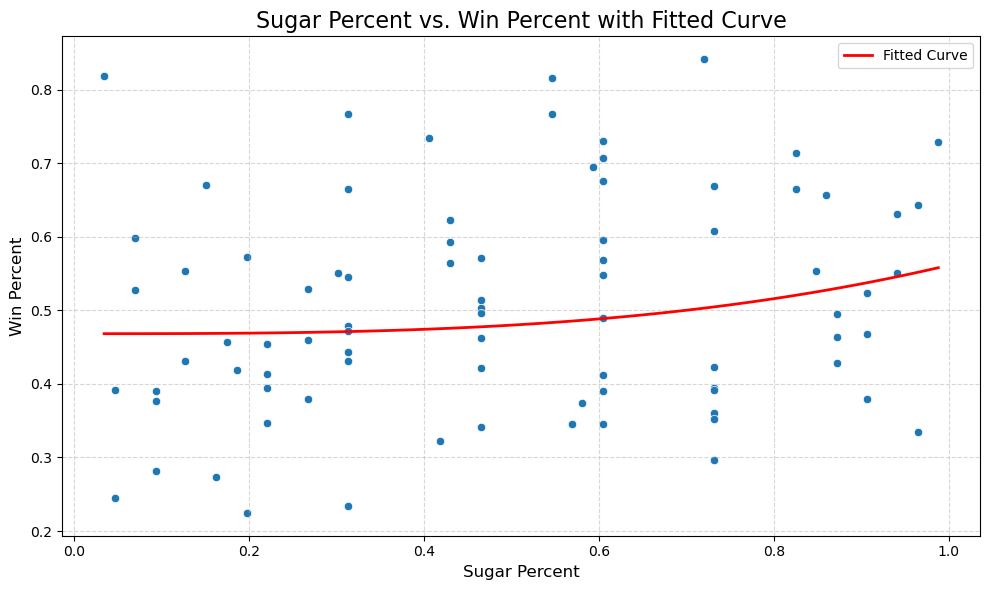

In [46]:
# visualize the effect

features = candy_ingredients_interaction + ['peanutyalmondy', 'crispedricewafer'] + control_variables_without_sugar + ['sugarpercent' ,'winpercent']
utils.visualize_sugar_effect(prepared_data[features],cubed_sugar_model, non_linear_col='sugarpercent_cubed', non_liner_factor=3)


Our analysis using a cubic regression model revealed a non-linear relationship between sugarpercent and winpercent. The resulting curve is nearly horizontal at lower sugar levels, indicating that small variations in sugar content have minimal impact on candy popularity within this range. However, above a certain threshold, the curve accelerates steeply, suggesting a 'sweet spot' where even small increases in sugar lead to a significant boost in popularity. This implies that prioritizing sugar content above this threshold is crucial for maximizing winpercent. While our data does not show diminishing returns, it is possible that such a point exists beyond the observed sugar range. Given the growing trend of health-conscious consumers, it's important to balance the appeal of higher sugar content with the demand for healthier options. Further research is recommended to explore the relationship at even higher sugar levels and investigate the potential of sugar alternatives to replicate the 'sweet spot' effect

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     6.625
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           3.43e-07
Time:                        21:02:05   Log-Likelihood:                 75.418
No. Observations:                  83   AIC:                            -128.8
Df Residuals:                      72   BIC:                            -102.2
Df Model:                          10                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3599      0.055      6.592      0.000       0.253       0.467
chocolate                      0.1502      0.045      3.335      0.001       0.062       0.238
fruity                         0.0713      0.042      1.712      0.087      -0.010       0.153
caramel                       -0.0464      0.075     -0.616      0.538      -0.194       0.101
chocolate:peanutyalmondy       0.1196      0.052      2.281      0.023       0.017       0.222
chocolate:crispedricewafer     0.0786      0.071      1.103      0.270      -0.061       0.218
chocolate:caramel              0.0949      0.086      1.103      0.270      -0.074       0.264
hard                          -0.0575      0.033     -1.741      0.082      -0.122       0.007
bar                           -0.0054      0.051     -0.106      0.915      -0.105       0.094
pluribus                      -0.0129      0.032     -0.400      0.689      -0.076       0.050
sugarpercent                   0.0764      0.049      1.557      0.119      -0.020       0.172
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.604
Skew:                          -0.037   Prob(JB):                        0.739
Kurtosis:                       2.589   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

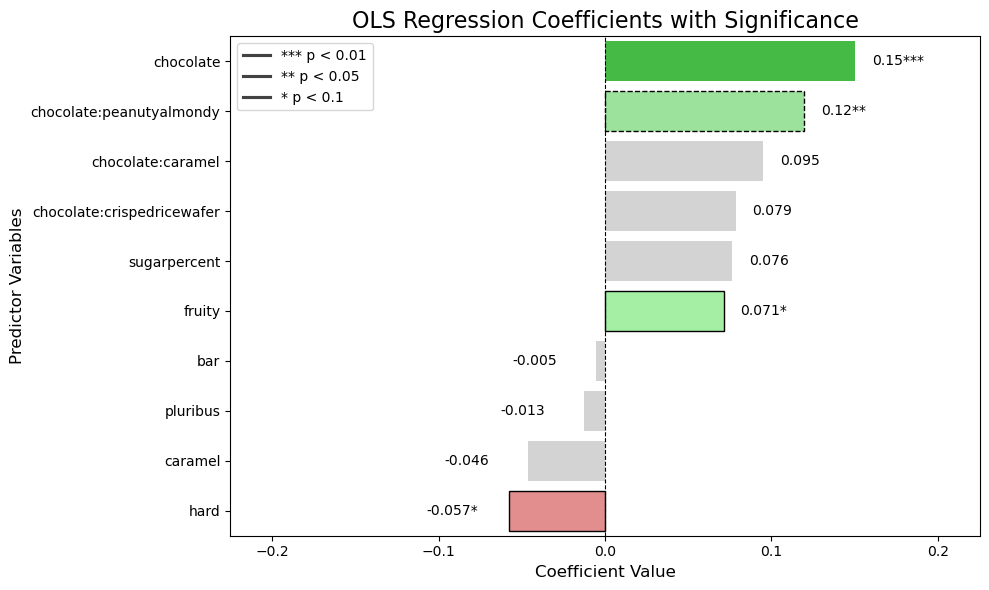

In [47]:
# lets finaly check our interpretation without the non-liear term for the sugar

features_liear = candy_ingredients_interaction +  control_variables_without_sugar + ['sugarpercent' ,'winpercent']

cubed_sugar_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {cubed_sugar_forumlar} + {control_formular_without_sugar} + sugarpercent')

After excluding the non-linearity for the sugarpercent, we see that the effect of sugar is not statistically significant, indicating that the non-linearity is the primary driver of the sugar effect on the winpercent. This is consistent with the findings of the cubic regression model. Therefore, we can conclude that the sugar content of the candy has a non-linear effect on the winpercent, with a 'sweet spot' where small increases in sugar content lead to a significant boost in popularity. This suggests that the optimal sugar content for a popular candy is within a specific range, and exceeding this range may not further increase popularity. To identify this 'sweet spot' more precisely, and to determine if there is a point of diminishing returns, further research is recommended to explore the relationship between sugar content and winpercent in more detail, and with a wider range of sugar content data.



### Robustness Check: Price

In [48]:

# lets check the VIF values again
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + ['sugarpercent_squared', 'pricepercent'])


,feature,VIF,High VIF
0,chocolate,4.412520,False
1,fruity,2.710240,False
2,caramel,3.941310,False
3,chocolate:peanutyalmondy,1.599050,False
4,chocolate:crispedricewafer,1.425652,False
5,chocolate:caramel,4.288358,False
6,hard,1.504189,False
7,bar,3.540828,False
8,pluribus,2.842899,False
9,sugarpercent_squared,2.587246,False


In [49]:
# we see that price has a strong relationship with the other vairables  (VIF > 5)

# to reduce the multicollinearity we will center the price to the mean
# Thus if a price is now positive its higher than the mean, if its negative its lower than the mean price in the dataset
prepared_data['pricepercent_centered'] = prepared_data['pricepercent'] - prepared_data['pricepercent'].mean()

# lets check the VIF values again
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + ['sugarpercent_squared', 'pricepercent_centered'])

,feature,VIF,High VIF
0,chocolate,3.805855,False
1,fruity,2.764354,False
2,caramel,3.733853,False
3,chocolate:peanutyalmondy,1.580419,False
4,chocolate:crispedricewafer,1.428570,False
5,chocolate:caramel,4.084819,False
6,hard,1.522487,False
7,bar,3.019436,False
8,pluribus,2.566407,False
9,sugarpercent_squared,2.478932,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     6.080
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           6.52e-07
Time:                        21:02:05   Log-Likelihood:                 76.721
No. Observations:                  83   AIC:                            -129.4
Df Residuals:                      71   BIC:                            -100.4
Df Model:                          11                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3531      0.054      6.554      0.000       0.248       0.459
chocolate                      0.1595      0.048      3.334      0.001       0.066       0.253
fruity                         0.0728      0.042      1.744      0.081      -0.009       0.155
caramel                       -0.0387      0.076     -0.507      0.612      -0.188       0.111
chocolate:peanutyalmondy       0.1239      0.054      2.292      0.022       0.018       0.230
chocolate:crispedricewafer     0.0848      0.075      1.138      0.255      -0.061       0.231
chocolate:caramel              0.0826      0.088      0.939      0.348      -0.090       0.255
hard                          -0.0605      0.033     -1.849      0.064      -0.125       0.004
bar                            0.0168      0.053      0.317      0.751      -0.087       0.121
pluribus                      -0.0082      0.032     -0.259      0.796      -0.071       0.054
sugarpercent_squared           0.0977      0.043      2.259      0.024       0.013       0.182
pricepercent_centered         -0.0589      0.060     -0.976      0.329      -0.177       0.059
==============================================================================
Omnibus:                        0.636   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.725
Skew:                          -0.043   Prob(JB):                        0.696
Kurtosis:                       2.550   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

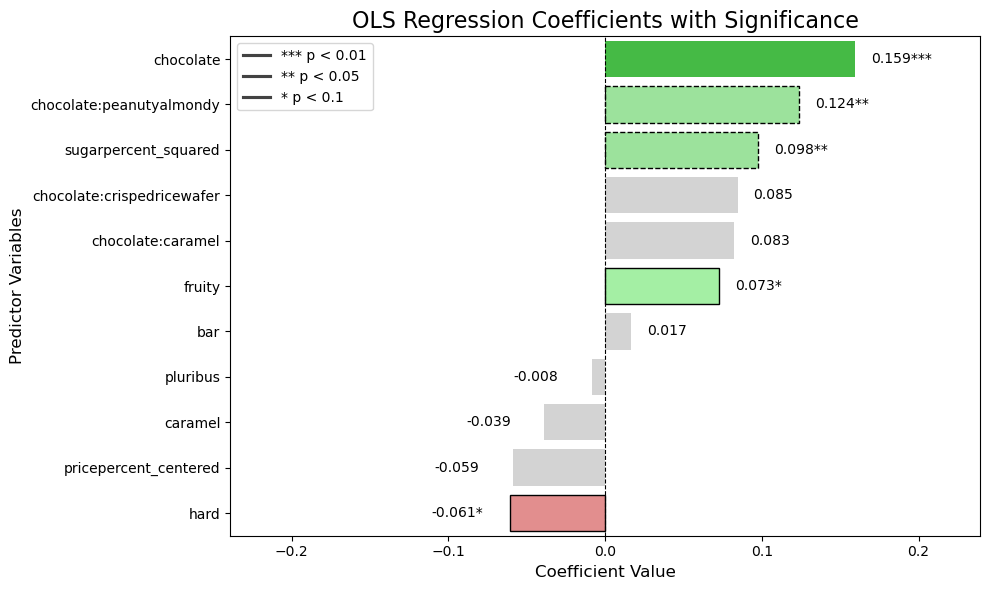

In [50]:
# build the model
centered_price_formular = ' + '.join(candy_ingredients_interaction)
centered_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {centered_price_formular} + {control_formular_without_sugar} + sugarpercent_squared + pricepercent_centered')

In [51]:
# as alternativ check lets build price categories based on the quantiles (0.25, 0.5, 0.75)
prepared_data['price_category'] = pd.qcut(prepared_data['pricepercent'], q=4, labels=['low', 'medium', 'high', 'very_high'])
# lets label encode the price category
prepared_data = pd.get_dummies(prepared_data, columns=['price_category'], drop_first=True, dtype=int)


# check the VIF values
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + ['sugarpercent_squared'] + ['price_category_medium', 'price_category_high', 'price_category_very_high'])


,feature,VIF,High VIF
0,chocolate,4.563383,False
1,fruity,2.817995,False
2,caramel,4.419821,False
3,chocolate:peanutyalmondy,1.636898,False
4,chocolate:crispedricewafer,1.437162,False
5,chocolate:caramel,4.690290,False
6,hard,1.512960,False
7,bar,3.621790,False
8,pluribus,2.755030,False
9,sugarpercent_squared,2.611511,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     4.951
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           4.72e-06
Time:                        21:02:06   Log-Likelihood:                 77.636
No. Observations:                  83   AIC:                            -127.3
Df Residuals:                      69   BIC:                            -93.41
Df Model:                          13                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3743      0.055      6.857      0.000       0.267       0.481
chocolate                      0.1584      0.052      3.032      0.002       0.056       0.261
fruity                         0.0705      0.045      1.580      0.114      -0.017       0.158
caramel                       -0.0332      0.079     -0.422      0.673      -0.188       0.121
chocolate:peanutyalmondy       0.1205      0.057      2.107      0.035       0.008       0.233
chocolate:crispedricewafer     0.0891      0.080      1.120      0.263      -0.067       0.245
chocolate:caramel              0.0733      0.091      0.803      0.422      -0.106       0.252
hard                          -0.0576      0.034     -1.694      0.090      -0.124       0.009
bar                            0.0294      0.060      0.487      0.627      -0.089       0.148
pluribus                      -0.0063      0.033     -0.192      0.847      -0.070       0.058
sugarpercent_squared           0.0981      0.043      2.281      0.023       0.014       0.182
price_category_medium         -0.0113      0.035     -0.321      0.748      -0.081       0.058
price_category_high           -0.0215      0.043     -0.496      0.620      -0.107       0.063
price_category_very_high      -0.0635      0.050     -1.282      0.200      -0.161       0.034
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.568
Skew:                          -0.077   Prob(JB):                        0.753
Kurtosis:                       2.625   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

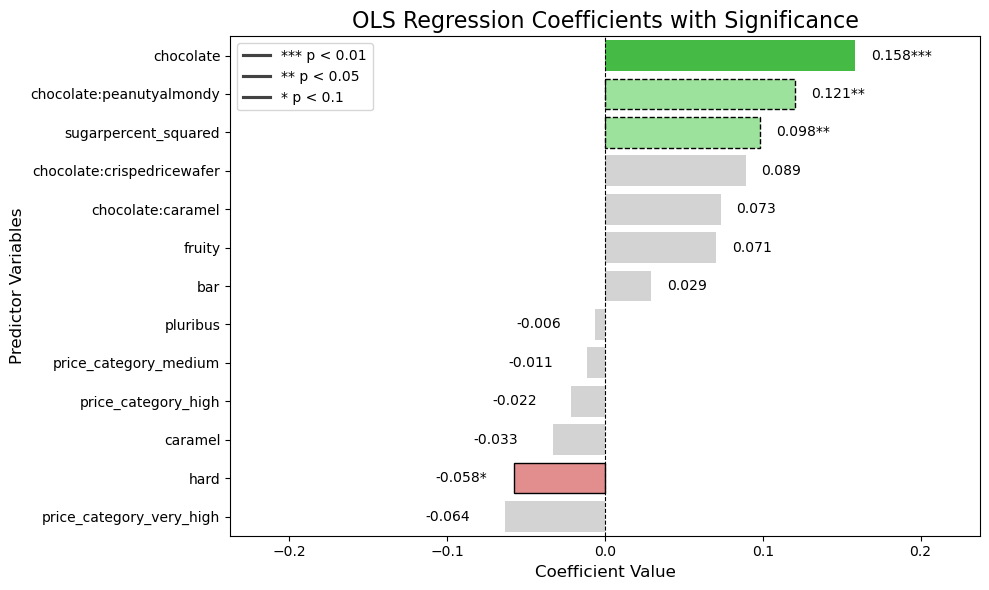

In [52]:
# build the model

price_category_formular = ' + '.join(candy_ingredients_interaction)
price_category_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {price_category_formular} + {control_formular_without_sugar} + sugarpercent_squared + price_category_medium + price_category_high + price_category_very_high')

The key effects from the previous analysis remain significant, except for fruity flavors, whose statistical significance is absorbed by price. This indicates a strong correlation between price and fruity flavors, suggesting that their popularity may be driven by pricing rather than intrinsic consumer preference. To better understand this relationship, further analysis is needed to isolate the effect of price from ingredient preferences, such as testing interaction terms or conducting a stratified analysis by price category. This will help clarify the true impact of fruity flavors on candy popularity and inform product development decisions.



Therfore lets now validate the model by checking the interactions of price and ingredients on the winpercent.

In [53]:
# lets start with price:fruity since this is the most obvious interaction

prepared_data['pricepercent:fruity'] = prepared_data['pricepercent'] * prepared_data['fruity']
# lets exclude fruity to isolate the effect of the interaction

price_fruity_ingredients = candy_ingredients_interaction.copy()
price_fruity_ingredients.remove('fruity')


# lets check the VIF values
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:fruity'])

,feature,VIF,High VIF
0,chocolate,3.824069,False
1,fruity,4.095512,False
2,caramel,3.725962,False
3,chocolate:peanutyalmondy,1.570081,False
4,chocolate:crispedricewafer,1.405381,False
5,chocolate:caramel,4.078150,False
6,hard,1.503794,False
7,bar,2.894770,False
8,pluribus,2.572682,False
9,sugarpercent_squared,2.379686,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     6.653
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           3.22e-07
Time:                        21:02:06   Log-Likelihood:                 74.339
No. Observations:                  83   AIC:                            -126.7
Df Residuals:                      72   BIC:                            -100.1
Df Model:                          10                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4423      0.038     11.671      0.000       0.368       0.517
chocolate                      0.0948      0.040      2.374      0.018       0.017       0.173
caramel                       -0.0989      0.061     -1.623      0.105      -0.218       0.021
chocolate:peanutyalmondy       0.1139      0.050      2.277      0.023       0.016       0.212
chocolate:crispedricewafer     0.0792      0.072      1.096      0.273      -0.062       0.221
chocolate:caramel              0.1460      0.075      1.940      0.052      -0.001       0.294
hard                          -0.0506      0.032     -1.596      0.110      -0.113       0.012
bar                           -0.0187      0.046     -0.405      0.685      -0.109       0.072
pluribus                      -0.0251      0.031     -0.820      0.412      -0.085       0.035
sugarpercent_squared           0.0852      0.046      1.866      0.062      -0.004       0.175
pricepercent:fruity           -0.0166      0.079     -0.211      0.833      -0.171       0.138
==============================================================================
Omnibus:                        0.678   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.744
Skew:                          -0.002   Prob(JB):                        0.689
Kurtosis:                       2.536   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

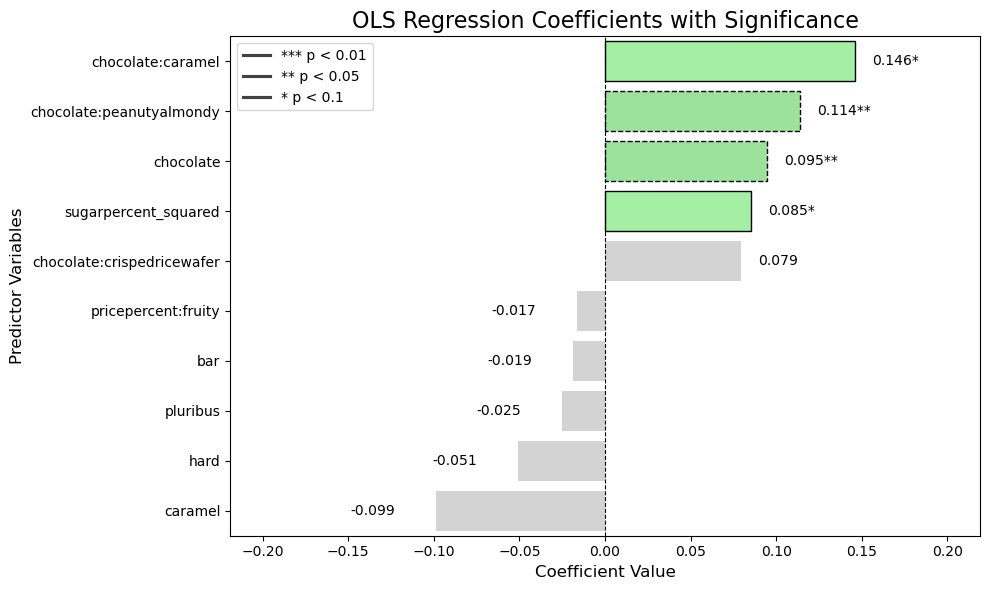

In [54]:
# build the model
price_fruity_formular = ' + '.join(price_fruity_ingredients)
price_fruity_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {price_fruity_formular} + {control_formular_without_sugar} + sugarpercent_squared + pricepercent:fruity ')

We can see that, when controling controling fruity for the price that there is no signfiicant effect andymore. This the popularity of fruity may not be tied to the price of a fruity candy

In [55]:
# next lets check the interaction between price and the other ingredients

# lets start with price:chocolate 
chocolate_price_ingredients = candy_ingredients_interaction.copy()
prepared_data['pricepercent:chocolate'] = prepared_data['pricepercent'] * prepared_data['chocolate']

# lets check the VIF values
utils.calculate_vif(prepared_data, chocolate_price_ingredients + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:chocolate'])


,feature,VIF,High VIF
0,chocolate,8.527078,True
1,fruity,2.556082,False
2,caramel,3.726421,False
3,chocolate:peanutyalmondy,1.613742,False
4,chocolate:crispedricewafer,1.479855,False
5,chocolate:caramel,4.092313,False
6,hard,1.508030,False
7,bar,3.140633,False
8,pluribus,2.560719,False
9,sugarpercent_squared,2.431096,False


In [56]:
# here we need to remove the chocolate since it is highly correlated with the interaction term

chocolate_price_ingredients.remove('chocolate')
utils.calculate_vif(prepared_data, chocolate_price_ingredients + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:chocolate'])


,feature,VIF,High VIF
0,fruity,2.481845,False
1,caramel,3.725765,False
2,chocolate:peanutyalmondy,1.573691,False
3,chocolate:crispedricewafer,1.473102,False
4,chocolate:caramel,4.088590,False
5,hard,1.496709,False
6,bar,3.068877,False
7,pluribus,2.342996,False
8,sugarpercent_squared,2.426534,False
9,pricepercent:chocolate,4.433210,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     5.801
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           2.40e-06
Time:                        21:02:08   Log-Likelihood:                 72.366
No. Observations:                  83   AIC:                            -122.7
Df Residuals:                      72   BIC:                            -96.13
Df Model:                          10                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4426      0.053      8.386      0.000       0.339       0.546
fruity                         0.0174      0.042      0.419      0.675      -0.064       0.099
caramel                       -0.0962      0.066     -1.452      0.147      -0.226       0.034
chocolate:peanutyalmondy       0.1255      0.058      2.167      0.030       0.012       0.239
chocolate:crispedricewafer     0.0722      0.080      0.907      0.365      -0.084       0.228
chocolate:caramel              0.1495      0.079      1.894      0.058      -0.005       0.304
hard                          -0.0612      0.033     -1.882      0.060      -0.125       0.003
bar                           -0.0172      0.055     -0.314      0.753      -0.124       0.090
pluribus                      -0.0265      0.034     -0.785      0.432      -0.092       0.040
sugarpercent_squared           0.0701      0.045      1.566      0.117      -0.018       0.158
pricepercent:chocolate         0.1297      0.081      1.602      0.109      -0.029       0.288
==============================================================================
Omnibus:                        0.477   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.612
Skew:                          -0.013   Prob(JB):                        0.736
Kurtosis:                       2.580   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

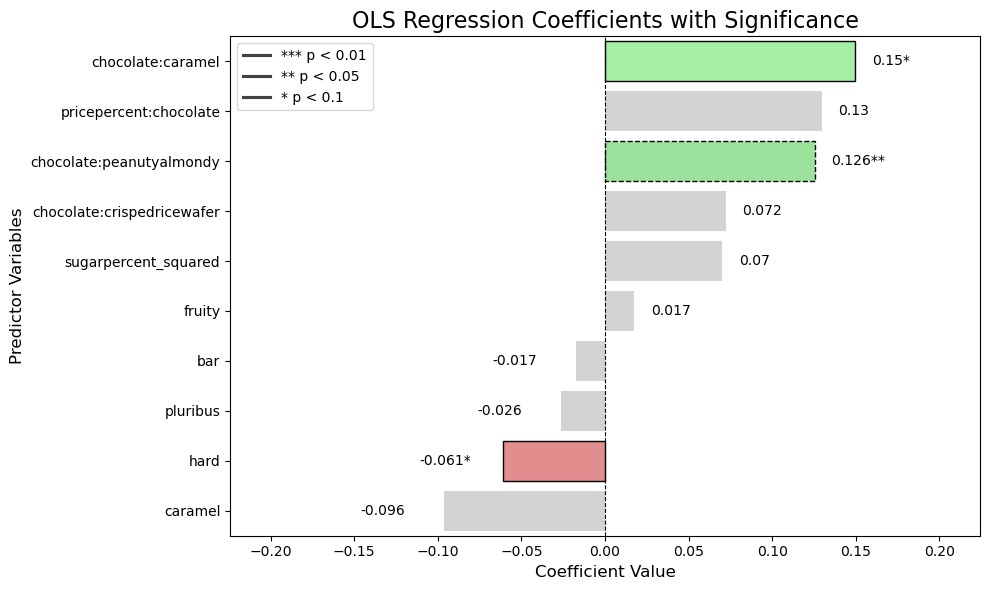

In [57]:
# lets build the model
chocolate_price_formular = ' + '.join(chocolate_price_ingredients)
chocolate_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {chocolate_price_formular} + {control_formular_without_sugar} + sugarpercent_squared + pricepercent:chocolate ')

The interaction between price and chocolate is not statistically significant, indicating that the effect of chocolate on winpercent is relatively consistent across different price ranges

In [58]:
# next lets check the interaction between price and caramel

# lets start with price:chocolate 
caramel_price_ingredients = candy_ingredients_interaction.copy()
prepared_data['pricepercent:caramel'] = prepared_data['pricepercent'] * prepared_data['caramel']

# lets check the VIF values

utils.calculate_vif(prepared_data, caramel_price_ingredients + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:caramel'])
 

,feature,VIF,High VIF
0,chocolate,3.870395,False
1,fruity,2.591341,False
2,caramel,10.360978,True
3,chocolate:peanutyalmondy,1.572121,False
4,chocolate:crispedricewafer,1.451557,False
5,chocolate:caramel,6.527213,True
6,hard,1.517489,False
7,bar,2.892166,False
8,pluribus,2.568862,False
9,sugarpercent_squared,2.522936,False


In [59]:
# we should remove caramel and chocolate:caramel since they are highly correlated with the interaction term
caramel_price_ingredients.remove('caramel')
caramel_price_ingredients.remove('chocolate:caramel')
utils.calculate_vif(prepared_data, caramel_price_ingredients + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:caramel'])


,feature,VIF,High VIF
0,chocolate,3.751735,False
1,fruity,2.561231,False
2,chocolate:peanutyalmondy,1.570888,False
3,chocolate:crispedricewafer,1.417727,False
4,hard,1.496540,False
5,bar,2.859834,False
6,pluribus,2.559242,False
7,sugarpercent_squared,2.414009,False
8,pricepercent:caramel,1.591358,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     8.464
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.52e-08
Time:                        21:02:09   Log-Likelihood:                 75.301
No. Observations:                  83   AIC:                            -130.6
Df Residuals:                      73   BIC:                            -106.4
Df Model:                           9                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3404      0.044      7.749      0.000       0.254       0.426
chocolate                      0.1718      0.041      4.164      0.000       0.091       0.253
fruity                         0.0911      0.037      2.432      0.015       0.018       0.164
chocolate:peanutyalmondy       0.1219      0.051      2.398      0.016       0.022       0.221
chocolate:crispedricewafer     0.0779      0.071      1.101      0.271      -0.061       0.216
hard                          -0.0563      0.029     -1.915      0.055      -0.114       0.001
bar                            0.0167      0.049      0.338      0.735      -0.080       0.113
pluribus                      -0.0020      0.031     -0.066      0.948      -0.062       0.058
sugarpercent_squared           0.0830      0.044      1.898      0.058      -0.003       0.169
pricepercent:caramel           0.0361      0.063      0.571      0.568      -0.088       0.160
==============================================================================
Omnibus:                        0.816   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.848
Skew:                          -0.068   Prob(JB):                        0.655
Kurtosis:                       2.524   Cond. No.                         7.99
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

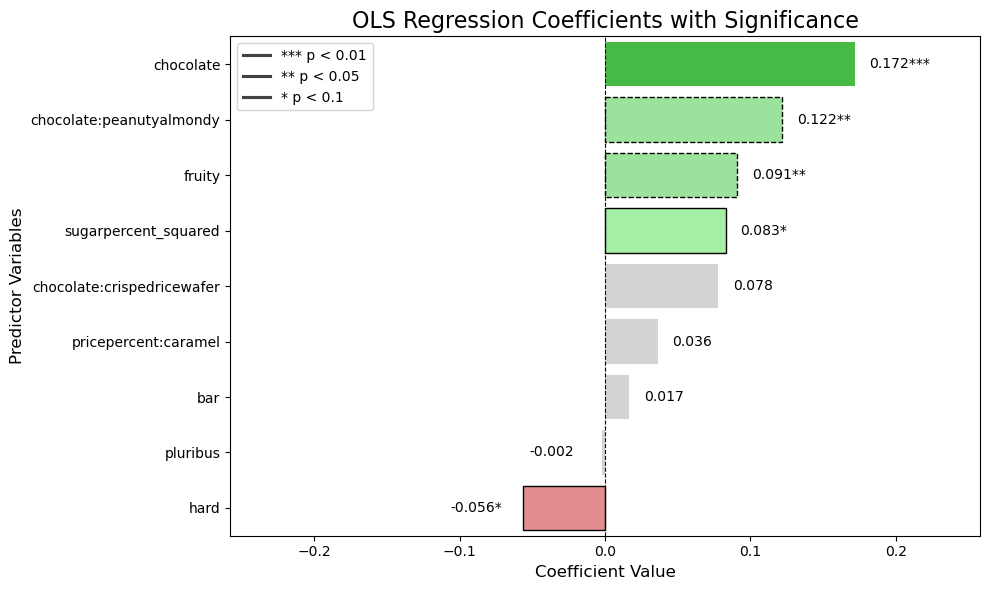

In [60]:
# so lets build the model
caramel_price_formular = ' + '.join(caramel_price_ingredients)
caramel_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {caramel_price_formular} + {control_formular_without_sugar} + sugarpercent_squared + pricepercent:caramel ')

The interaction between price and caramel is not statistically significant, indicating that the effect of caramel on winpercent is consistent across different price ranges.


In [61]:
# so next lets check the interaction between chocolate:peanutyalmondy and price

# lets start with price:chocolate
chocolate_peanutyalmondy_price_ingredients = candy_ingredients_interaction.copy()
prepared_data['pricepercent:chocolate:peanutyalmondy'] = prepared_data['pricepercent'] * prepared_data['chocolate'] * prepared_data['peanutyalmondy']


# lets check the VIF values
utils.calculate_vif(prepared_data, chocolate_peanutyalmondy_price_ingredients + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:chocolate:peanutyalmondy'])

,feature,VIF,High VIF
0,chocolate,3.983077,False
1,fruity,2.560260,False
2,caramel,3.721753,False
3,chocolate:peanutyalmondy,26.867673,True
4,chocolate:crispedricewafer,1.423883,False
5,chocolate:caramel,4.080408,False
6,hard,1.504103,False
7,bar,3.293352,False
8,pluribus,2.594488,False
9,sugarpercent_squared,2.345708,False


In [62]:
# as expected we need to remove the chocolate and peanutyalmondy since they are highly correlated with the interaction term
chocolate_peanutyalmondy_price_ingredients.remove('chocolate:peanutyalmondy')
utils.calculate_vif(prepared_data, chocolate_peanutyalmondy_price_ingredients + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:chocolate:peanutyalmondy'])

,feature,VIF,High VIF
0,chocolate,3.609662,False
1,fruity,2.543342,False
2,caramel,3.721674,False
3,chocolate:crispedricewafer,1.417417,False
4,chocolate:caramel,4.077773,False
5,hard,1.502406,False
6,bar,2.893783,False
7,pluribus,2.544980,False
8,sugarpercent_squared,2.344485,False
9,pricepercent:chocolate:peanutyalmondy,1.541252,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     6.799
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           2.30e-07
Time:                        21:02:09   Log-Likelihood:                 73.742
No. Observations:                  83   AIC:                            -125.5
Df Residuals:                      72   BIC:                            -98.88
Df Model:                          10                                         
Covariance Type:                  HC3                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.3795      0.055      6.849      0.000       0.271       0.488
chocolate                                 0.1604      0.046      3.521      0.000       0.071       0.250
fruity                                    0.0675      0.042      1.604      0.109      -0.015       0.150
caramel                                  -0.0532      0.076     -0.701      0.483      -0.202       0.096
chocolate:crispedricewafer                0.0749      0.069      1.079      0.280      -0.061       0.211
chocolate:caramel                         0.0999      0.087      1.154      0.248      -0.070       0.270
hard                                     -0.0614      0.033     -1.843      0.065      -0.127       0.004
bar                                      -0.0133      0.055     -0.240      0.810      -0.122       0.095
pluribus                                 -0.0211      0.036     -0.594      0.553      -0.091       0.049
sugarpercent_squared                      0.0866      0.044      1.981      0.048       0.001       0.172
pricepercent:chocolate:peanutyalmondy     0.1320      0.070      1.879      0.060      -0.006       0.270
==============================================================================
Omnibus:                        0.361   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.532
Skew:                           0.085   Prob(JB):                        0.766
Kurtosis:                       2.646   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

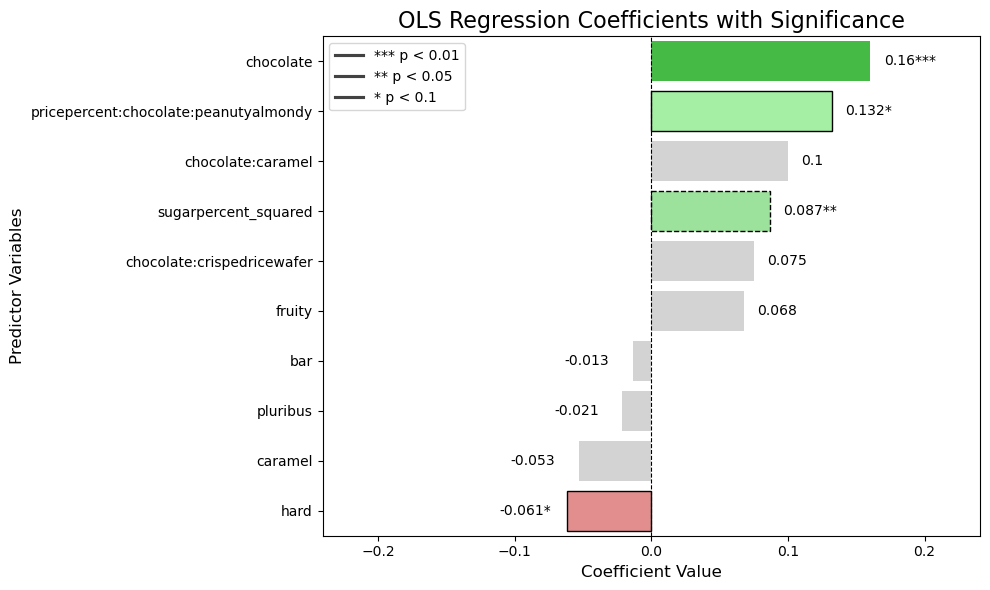

In [63]:
# so lets build the model
chocolate_peanutyalmondy_price_formular = ' + '.join(chocolate_peanutyalmondy_price_ingredients)
chocolate_peanutyalmondy_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {chocolate_peanutyalmondy_price_formular} + {control_formular_without_sugar} + sugarpercent_squared + pricepercent:chocolate:peanutyalmondy ')

When we control for price within the chocolate:peanutyalmondy combination, we observe a marginal significant positive effect on winpercent. 
This reinforces the strength of our finding regarding the popularity of this combination, even when price is considered. 
However, the interaction term's reduced significance compared to the main effect indicates that price might weaken the positive impact of chocolate:peanutyalmondy at higher price levels

In [64]:
# lets check the interaction between chocolate:crispedricewafer and price

cocholate_crisp_price_ingredients = candy_ingredients_interaction.copy()
prepared_data['pricepercent:chocolate:crispedricewafer'] = prepared_data['pricepercent'] * prepared_data['chocolate'] * prepared_data['crispedricewafer']

# lets check the VIF values
utils.calculate_vif(prepared_data, cocholate_crisp_price_ingredients + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:chocolate:crispedricewafer'])

,feature,VIF,High VIF
0,chocolate,3.814779,False
1,fruity,2.545443,False
2,caramel,3.722426,False
3,chocolate:peanutyalmondy,1.599429,False
4,chocolate:crispedricewafer,33.883398,True
5,chocolate:caramel,4.094265,False
6,hard,1.504003,False
7,bar,2.912004,False
8,pluribus,2.561392,False
9,sugarpercent_squared,2.361736,False


In [65]:
# as expected we need to remove the chocolate and crispedricewafer since they are highly correlated with the interaction term
cocholate_crisp_price_ingredients.remove('chocolate:crispedricewafer')
utils.calculate_vif(prepared_data, cocholate_crisp_price_ingredients + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:chocolate:crispedricewafer'])


,feature,VIF,High VIF
0,chocolate,3.813080,False
1,fruity,2.544707,False
2,caramel,3.721552,False
3,chocolate:peanutyalmondy,1.584569,False
4,chocolate:caramel,4.083550,False
5,hard,1.503632,False
6,bar,2.863859,False
7,pluribus,2.560410,False
8,sugarpercent_squared,2.347894,False
9,pricepercent:chocolate:crispedricewafer,1.399239,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     7.009
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.43e-07
Time:                        21:02:09   Log-Likelihood:                 75.814
No. Observations:                  83   AIC:                            -129.6
Df Residuals:                      72   BIC:                            -103.0
Df Model:                          10                                         
Covariance Type:                  HC3                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.3683      0.050      7.353      0.000       0.270       0.466
chocolate                                   0.1516      0.043      3.497      0.000       0.067       0.237
fruity                                      0.0729      0.040      1.804      0.071      -0.006       0.152
caramel                                    -0.0450      0.075     -0.601      0.548      -0.192       0.102
chocolate:peanutyalmondy                    0.1199      0.049      2.442      0.015       0.024       0.216
chocolate:caramel                           0.0897      0.086      1.046      0.295      -0.078       0.258
hard                                       -0.0580      0.033     -1.775      0.076      -0.122       0.006
bar                                         0.0032      0.050      0.064      0.949      -0.096       0.102
pluribus                                   -0.0126      0.032     -0.399      0.690      -0.075       0.050
sugarpercent_squared                        0.0833      0.043      1.950      0.051      -0.000       0.167
pricepercent:chocolate:crispedricewafer     0.0930      0.081      1.144      0.253      -0.066       0.252
==============================================================================
Omnibus:                        0.403   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.558
Skew:                           0.002   Prob(JB):                        0.756
Kurtosis:                       2.598   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

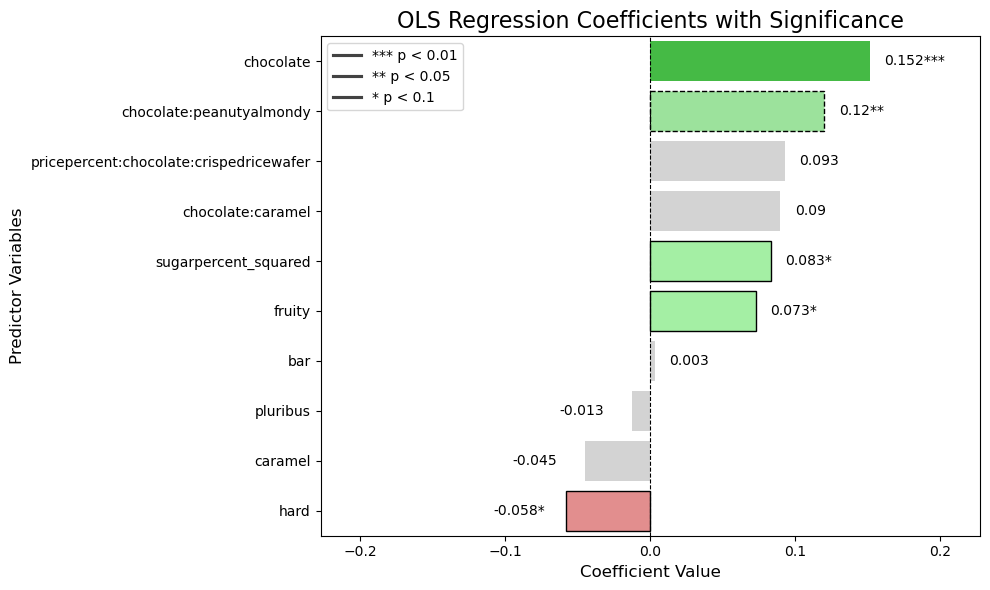

In [66]:
# check the model
cocholate_crisp_price_formular = ' + '.join(cocholate_crisp_price_ingredients)
cocholate_crisp_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {cocholate_crisp_price_formular} + {control_formular_without_sugar} + sugarpercent_squared + pricepercent:chocolate:crispedricewafer ')

Again we get no significant interaction term. thus the price does not influence the popularity of chocolate crispy rice wafer candies



In [67]:
# lets now check the ifnluence on sugarpercent_squared and price


# lets start with the interaction between sugar and price
prepared_data['sugarpercent_squared:pricepercent'] = prepared_data['sugarpercent_squared'] * prepared_data['pricepercent']

# remove sugarpercent_squared from the model

utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + ['sugarpercent_squared:pricepercent'])




,feature,VIF,High VIF
0,chocolate,3.907622,False
1,fruity,2.478802,False
2,caramel,3.772921,False
3,chocolate:peanutyalmondy,1.569216,False
4,chocolate:crispedricewafer,1.415246,False
5,chocolate:caramel,4.071918,False
6,hard,1.463077,False
7,bar,2.874380,False
8,pluribus,2.457908,False
9,sugarpercent_squared:pricepercent,2.190621,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     7.177
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           9.78e-08
Time:                        21:02:10   Log-Likelihood:                 74.977
No. Observations:                  83   AIC:                            -128.0
Df Residuals:                      72   BIC:                            -101.3
Df Model:                          10                                         
Covariance Type:                  HC3                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.3769      0.049      7.764      0.000       0.282       0.472
chocolate                             0.1452      0.042      3.473      0.001       0.063       0.227
fruity                                0.0735      0.038      1.918      0.055      -0.002       0.149
caramel                              -0.0482      0.071     -0.675      0.500      -0.188       0.092
chocolate:peanutyalmondy              0.1208      0.052      2.325      0.020       0.019       0.223
chocolate:crispedricewafer            0.0742      0.074      1.008      0.313      -0.070       0.218
chocolate:caramel                     0.0932      0.083      1.120      0.263      -0.070       0.256
hard                                 -0.0509      0.032     -1.590      0.112      -0.114       0.012
bar                                   0.0023      0.051      0.046      0.963      -0.097       0.102
pluribus                             -0.0095      0.033     -0.292      0.771      -0.073       0.054
sugarpercent_squared:pricepercent     0.1036      0.074      1.393      0.164      -0.042       0.249
==============================================================================
Omnibus:                        0.523   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.770   Jarque-Bera (JB):                0.666
Skew:                          -0.096   Prob(JB):                        0.717
Kurtosis:                       2.605   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

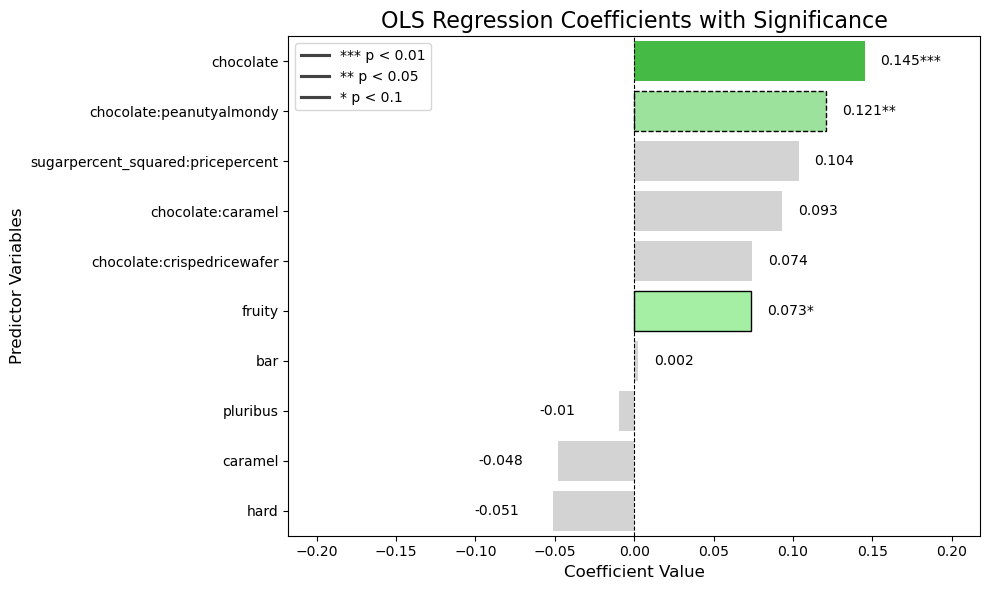

In [68]:
# build the model
sugar_price_formular = ' + '.join(candy_ingredients_interaction)
sugar_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {sugar_price_formular} + {control_formular_without_sugar} + sugarpercent_squared:pricepercent ')

Also the sugar_squared is not signficantly influenced by the price

In [69]:
# finaly lets check the interaction between price and hard form

prepared_data['pricepercent:hard'] = prepared_data['pricepercent'] * prepared_data['hard']
# lets drop hard form the controls
control_variables_without_hard = control_variables_without_sugar.copy()
control_variables_without_hard.remove('hard')

# lets check the VIF values
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_sugar + ['sugarpercent_squared']  +['pricepercent:hard'])

,feature,VIF,High VIF
0,chocolate,3.803974,False
1,fruity,2.549519,False
2,caramel,3.727149,False
3,chocolate:peanutyalmondy,1.570255,False
4,chocolate:crispedricewafer,1.405379,False
5,chocolate:caramel,4.079851,False
6,hard,2.800245,False
7,bar,2.892183,False
8,pluribus,2.565619,False
9,sugarpercent_squared,2.358356,False


In [70]:
control_formular_without_sugar

'hard + bar + pluribus'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     6.164
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           5.30e-07
Time:                        21:02:10   Log-Likelihood:                 76.110
No. Observations:                  83   AIC:                            -128.2
Df Residuals:                      71   BIC:                            -99.19
Df Model:                          11                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3660      0.051      7.125      0.000       0.265       0.467
chocolate                      0.1529      0.045      3.422      0.001       0.065       0.241
fruity                         0.0747      0.041      1.802      0.072      -0.007       0.156
caramel                       -0.0447      0.076     -0.591      0.555      -0.193       0.103
chocolate:peanutyalmondy       0.1191      0.052      2.309      0.021       0.018       0.220
chocolate:crispedricewafer     0.0781      0.072      1.082      0.279      -0.063       0.219
chocolate:caramel              0.0895      0.087      1.031      0.302      -0.081       0.260
hard                          -0.0437      0.039     -1.108      0.268      -0.121       0.034
bar                            0.0018      0.050      0.035      0.972      -0.097       0.100
pluribus                      -0.0124      0.032     -0.386      0.700      -0.075       0.051
sugarpercent_squared           0.0860      0.043      2.003      0.045       0.002       0.170
pricepercent:hard             -0.0462      0.072     -0.639      0.523      -0.188       0.096
==============================================================================
Omnibus:                        0.393   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.553
Skew:                          -0.033   Prob(JB):                        0.758
Kurtosis:                       2.606   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

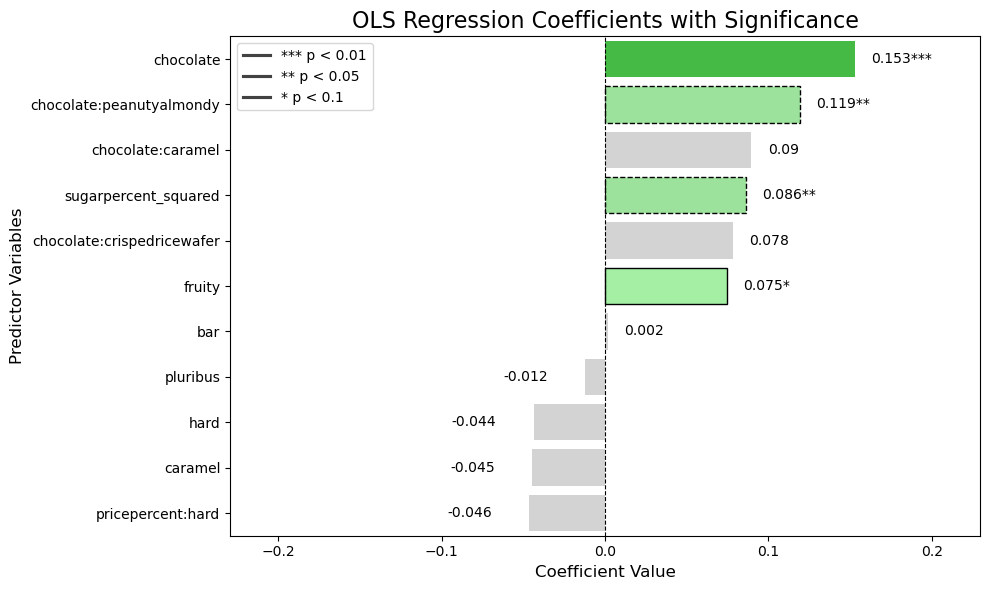

In [71]:
# build the model
hard_price_formular = ' + '.join(candy_ingredients_interaction)
hard_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {hard_price_formular} + {control_formular_without_sugar} + sugarpercent_squared + pricepercent:hard ')

Again here is no signfiicant interaticon between the price the hard candy form


In [72]:
# lets now check the interaction between price and bar form

prepared_data['pricepercent:bar'] = prepared_data['pricepercent'] * prepared_data['bar']
# lets drop bar form the controls
control_variables_without_bar = control_variables_without_sugar.copy()
control_variables_without_bar.remove('bar')

# lets check the VIF values
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_bar + ['sugarpercent_squared']  +['pricepercent:bar'])

,feature,VIF,High VIF
0,chocolate,3.537846,False
1,fruity,2.524886,False
2,caramel,3.721537,False
3,chocolate:peanutyalmondy,1.567406,False
4,chocolate:crispedricewafer,1.437031,False
5,chocolate:caramel,4.060404,False
6,hard,1.501264,False
7,pluribus,2.486021,False
8,sugarpercent_squared,2.339160,False
9,pricepercent:bar,2.662930,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     7.017
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.40e-07
Time:                        21:02:10   Log-Likelihood:                 75.989
No. Observations:                  83   AIC:                            -130.0
Df Residuals:                      72   BIC:                            -103.4
Df Model:                          10                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3685      0.049      7.548      0.000       0.273       0.464
chocolate                      0.1514      0.044      3.453      0.001       0.065       0.237
fruity                         0.0726      0.040      1.809      0.070      -0.006       0.151
caramel                       -0.0454      0.075     -0.608      0.543      -0.192       0.101
chocolate:peanutyalmondy       0.1190      0.052      2.307      0.021       0.018       0.220
chocolate:crispedricewafer     0.0780      0.075      1.045      0.296      -0.068       0.224
chocolate:caramel              0.0907      0.085      1.065      0.287      -0.076       0.258
hard                          -0.0581      0.033     -1.784      0.074      -0.122       0.006
pluribus                      -0.0128      0.030     -0.422      0.673      -0.073       0.047
sugarpercent_squared           0.0843      0.043      1.972      0.049       0.001       0.168
pricepercent:bar               0.0016      0.060      0.026      0.979      -0.116       0.119
==============================================================================
Omnibus:                        0.419   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.573
Skew:                          -0.035   Prob(JB):                        0.751
Kurtosis:                       2.599   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

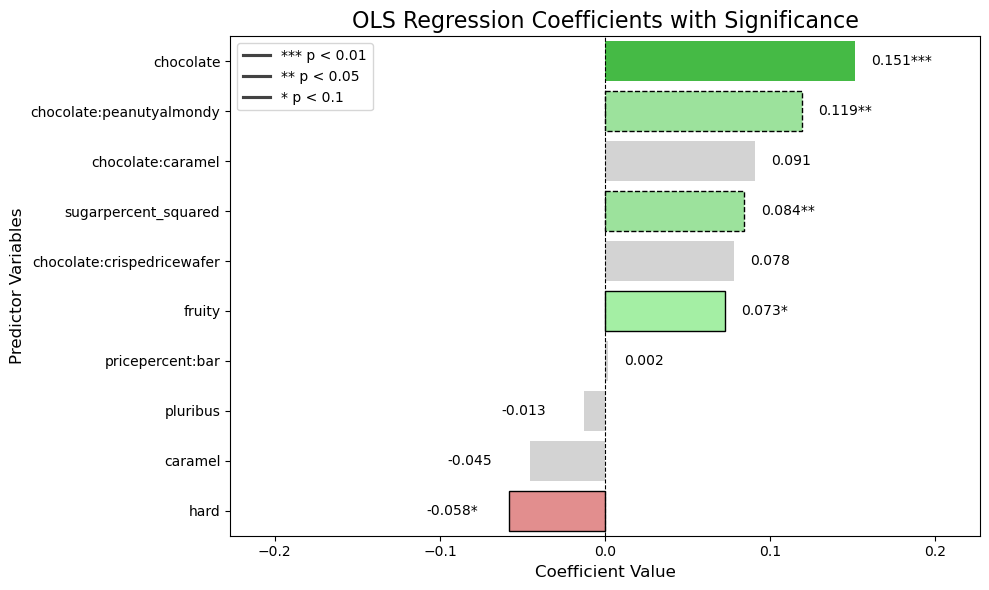

In [73]:
# model
bar_price_formular = ' + '.join(candy_ingredients_interaction)
control_variables_without_bar = ' + '.join(control_variables_without_bar)
bar_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {bar_price_formular} + {control_variables_without_bar} + sugarpercent_squared + pricepercent:bar ')

again we got no signficant interaction

In [74]:
# lets finally check plurbus

prepared_data['pricepercent:pluribus'] = prepared_data['pricepercent'] * prepared_data['pluribus']
# lets drop pluribus form the controls
control_variables_without_pluribus = control_variables_without_sugar.copy()
control_variables_without_pluribus.remove('pluribus')

# lets check the VIF values
utils.calculate_vif(prepared_data, candy_ingredients_interaction + control_variables_without_pluribus + ['sugarpercent_squared']  +['pricepercent:pluribus'])


,feature,VIF,High VIF
0,chocolate,3.668365,False
1,fruity,2.025808,False
2,caramel,3.732803,False
3,chocolate:peanutyalmondy,1.555962,False
4,chocolate:crispedricewafer,1.409512,False
5,chocolate:caramel,4.082599,False
6,hard,1.509892,False
7,bar,2.940533,False
8,sugarpercent_squared,2.380548,False
9,pricepercent:pluribus,1.983057,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     6.864
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.98e-07
Time:                        21:02:10   Log-Likelihood:                 76.982
No. Observations:                  83   AIC:                            -132.0
Df Residuals:                      72   BIC:                            -105.4
Df Model:                          10                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3768      0.040      9.309      0.000       0.297       0.456
chocolate                      0.1560      0.046      3.397      0.001       0.066       0.246
fruity                         0.0704      0.040      1.755      0.079      -0.008       0.149
caramel                       -0.0460      0.073     -0.628      0.530      -0.190       0.098
chocolate:peanutyalmondy       0.1179      0.052      2.277      0.023       0.016       0.219
chocolate:crispedricewafer     0.0822      0.071      1.165      0.244      -0.056       0.220
chocolate:caramel              0.0934      0.085      1.095      0.274      -0.074       0.261
hard                          -0.0637      0.032     -1.979      0.048      -0.127      -0.001
bar                           -0.0162      0.046     -0.351      0.725      -0.107       0.074
sugarpercent_squared           0.0943      0.041      2.303      0.021       0.014       0.174
pricepercent:pluribus         -0.0660      0.054     -1.227      0.220      -0.171       0.039
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.989
Skew:                          -0.010   Prob(JB):                        0.610
Kurtosis:                       2.466   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

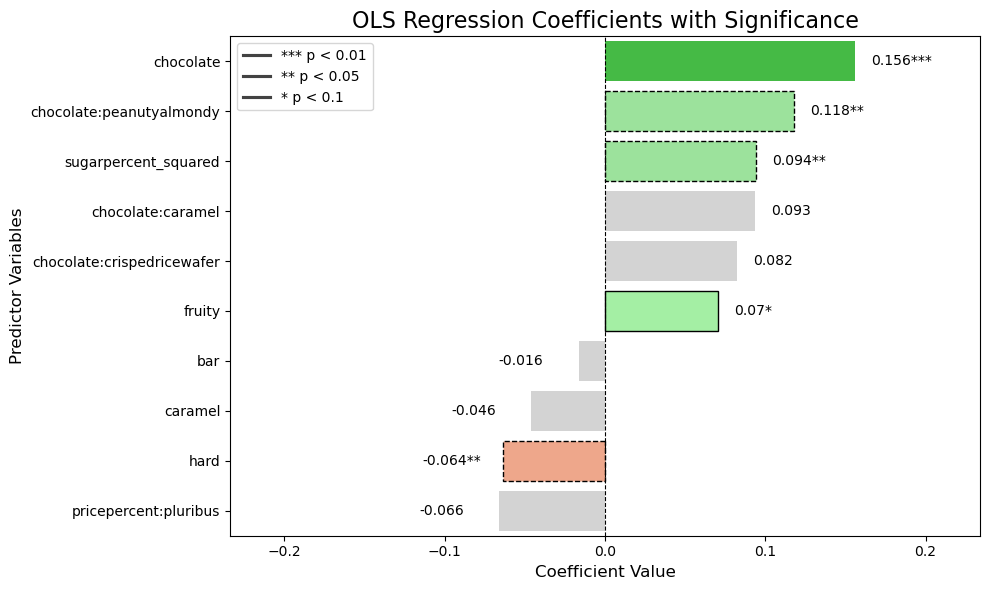

In [75]:
# so lets model
pluribus_price_formular = ' + '.join(candy_ingredients_interaction)
control_variables_without_pluribus = ' + '.join(control_variables_without_pluribus)
pluribus_price_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {pluribus_price_formular} + {control_variables_without_pluribus} + sugarpercent_squared + pricepercent:pluribus ')

interestingly, we see that the interaction between price and pluribus is not signfiicant but the significance of hard gets accelerated.

#### Robustness Check: P-Value Correction

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     6.907
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.80e-07
Time:                        21:02:10   Log-Likelihood:                 75.989
No. Observations:                  83   AIC:                            -130.0
Df Residuals:                      72   BIC:                            -103.4
Df Model:                          10                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3686      0.050      7.337      0.000       0.270       0.467
chocolate                      0.1514      0.044      3.434      0.001       0.065       0.238
fruity                         0.0725      0.041      1.790      0.073      -0.007       0.152
caramel                       -0.0455      0.075     -0.606      0.545      -0.193       0.102
chocolate:peanutyalmondy       0.1191      0.052      2.310      0.021       0.018       0.220
chocolate:crispedricewafer     0.0782      0.072      1.085      0.278      -0.063       0.219
chocolate:caramel              0.0908      0.086      1.052      0.293      -0.078       0.260
hard                          -0.0581      0.033     -1.779      0.075      -0.122       0.006
bar                            0.0010      0.050      0.019      0.985      -0.097       0.099
pluribus                      -0.0129      0.032     -0.407      0.684      -0.075       0.049
sugarpercent_squared           0.0842      0.043      1.969      0.049       0.000       0.168
==============================================================================
Omnibus:                        0.420   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.574
Skew:                          -0.035   Prob(JB):                        0.751
Kurtosis:                       2.599   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

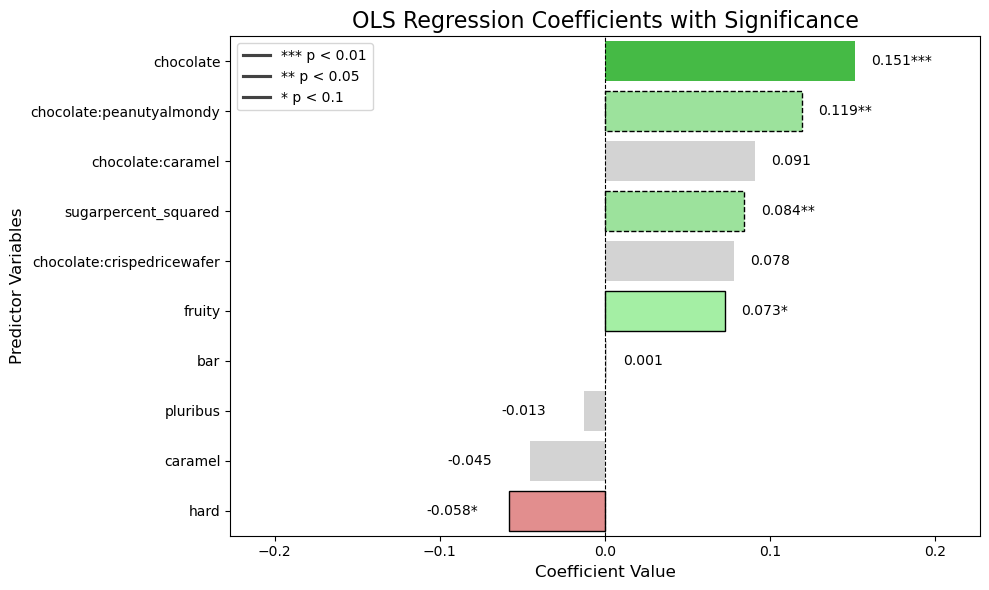

Corrected P-values:
Intercept: 0.0000 -- original p-value: 0.0000
chocolate: 0.0033 -- original p-value: 0.0006
fruity: 0.1381 -- original p-value: 0.0734
caramel: 0.6658 -- original p-value: 0.5447
chocolate:peanutyalmondy: 0.0767 -- original p-value: 0.0209
chocolate:crispedricewafer: 0.4024 -- original p-value: 0.2780
chocolate:caramel: 0.4024 -- original p-value: 0.2927
hard: 0.1381 -- original p-value: 0.0753
bar: 0.9846 -- original p-value: 0.9846
pluribus: 0.7528 -- original p-value: 0.6843
sugarpercent_squared: 0.1345 -- original p-value: 0.0489

Significant Variables (after FDR correction):
Intercept: 0.0000
chocolate: 0.0033


/var/folders/wh/tqsk328n72x7fzgb61f3s7f80000gn/T/ipykernel_47182/3535925936.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{name}: {p_corrected[i]:.4f} -- original p-value: {p_values[i]:.4f}")


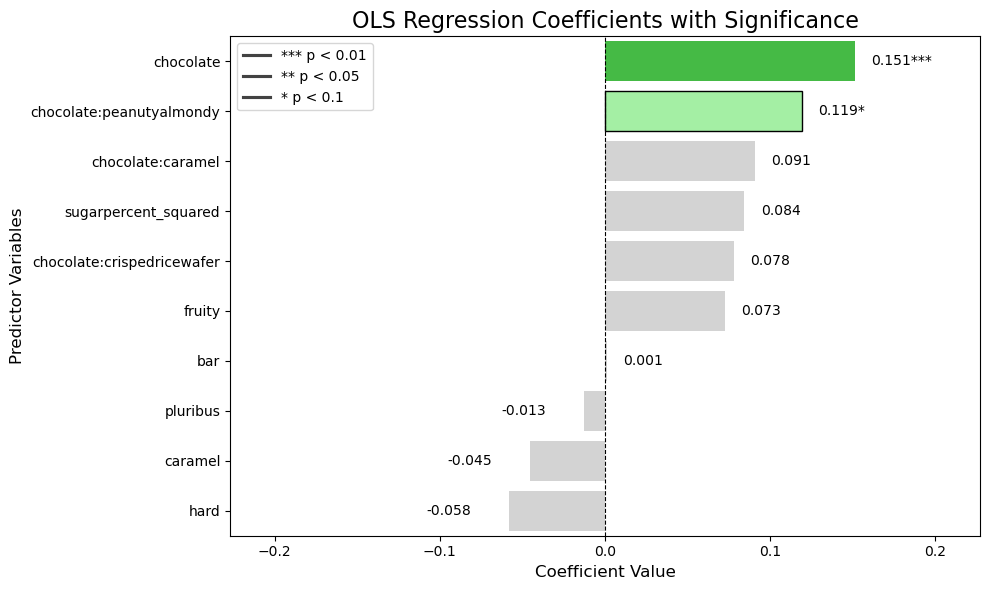

In [76]:
# Since a ols model tests multiple hypothesis at once there is a chance that we find significant results by chance
# To account for this we can apply a p-value correction method
# Here we will use the Benjamini-Hochberg FDR correction which is less conservative than the Bonferroni correction

# lets rebuild our final model (Ineraction Model) and apply the p-value correction

interaction_model = build_and_visualize_ols(prepared_data, f'winpercent ~ {interaction_formular} + {control_formular_without_sugar} + sugarpercent_squared'
                                            ,p_value_corr=True)


The p-value correction has a drastic effect on our results. we can clearly see, that only chocolate is further significant at an p < 0.01 level. This indicates that choclate  is the base driver for a successfull candy.
However, the interaction between chocolate and peanut almondy did loose some statsitical significane and is now only marginal significant (at p < 0.1), which could lead to the conclusion to build a simple chocolate candy. Yet, since the coefficient is still rather high, further explroring the combination of chocolate and peanut almondy could be very beneficial.

The other variables (Hard, fruity) are no more significant.

In [77]:
# gibt es produkte wie chocolate peanutalmondy?

prepared_data[(prepared_data['chocolate'] == 1) & (prepared_data['peanutyalmondy'] == 1)][CANDY_INGREDIENTS +['winpercent']].sort_values(by='winpercent', ascending=False)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,winpercent
50,1,0,0,1,0,0,0.841803
49,1,0,0,1,0,0,0.818663
62,1,0,1,1,1,0,0.766738
51,1,0,0,1,0,0,0.734350
52,1,0,0,1,0,0,0.728879
30,1,0,0,1,0,0,0.714651
40,1,0,0,1,0,0,0.707356
45,1,0,0,1,0,0,0.694838
63,1,0,1,1,0,1,0.595293
4,1,0,1,1,1,0,0.569145


In [78]:
prepared_data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'ingredient_combinations',
       'form_combinations', 'combination', 'sugarpercent_squared',
       'chocolate:peanutyalmondy', 'chocolate:crispedricewafer',
       'chocolate:caramel', 'sugarpercent_cubed', 'pricepercent_centered',
       'price_category_medium', 'price_category_high',
       'price_category_very_high', 'pricepercent:fruity',
       'pricepercent:chocolate', 'pricepercent:caramel',
       'pricepercent:chocolate:peanutyalmondy',
       'pricepercent:chocolate:crispedricewafer',
       'sugarpercent_squared:pricepercent', 'pricepercent:hard',
       'pricepercent:bar', 'pricepercent:pluribus'],
      dtype='object')

In [79]:
# lets check if a combination of chocolate and Peanut almondy is practical relevant even if the significane is not given

prepared_data[(prepared_data['chocolate'] == 1) & (prepared_data['peanutyalmondy'] == 1)][['competitorname','ingredient_combinations', 'winpercent']].sort_values(by="winpercent", ascending=False)

# here we can see that this combination is indeed feasible in practice, thus the p-value correction has mabye excluded a true hypothesis (which is not unrealistic due to the small set of variabels and dat)

,competitorname,ingredient_combinations,winpercent
50,Reese's Peanut Butter cup,chocolate+peanutyalmondy,0.841803
49,Reese's Miniatures,chocolate+peanutyalmondy,0.818663
62,Snickers,chocolate+caramel+peanutyalmondy+nougat,0.766738
51,Reese's pieces,chocolate+peanutyalmondy,0.734350
52,Reese's stuffed with pieces,chocolate+peanutyalmondy,0.728879
30,Peanut butter M&M's,chocolate+peanutyalmondy,0.714651
40,Nestle Butterfinger,chocolate+peanutyalmondy,0.707356
45,Peanut M&Ms,chocolate+peanutyalmondy,0.694838
63,Snickers Crisper,chocolate+caramel+peanutyalmondy+crispedricewafer,0.595293
4,Baby Ruth,chocolate+caramel+peanutyalmondy+nougat,0.569145


In [80]:
# Lets have a lock at all ingredent combinations.


prepared_data[['competitorname','ingredient_combinations', 'winpercent']].sort_values(by='winpercent', ascending=False).head(10)

# here we can also see a clear trend that chocolate combined with peanut almondy is in the leading corer of the win percent

,competitorname,ingredient_combinations,winpercent
50,Reese's Peanut Butter cup,chocolate+peanutyalmondy,0.841803
49,Reese's Miniatures,chocolate+peanutyalmondy,0.818663
77,Twix,chocolate+caramel+crispedricewafer,0.816429
26,Kit Kat,chocolate+crispedricewafer,0.767686
62,Snickers,chocolate+caramel+peanutyalmondy+nougat,0.766738
51,Reese's pieces,chocolate+peanutyalmondy,0.734350
34,Milky Way,chocolate+caramel+nougat,0.730996
52,Reese's stuffed with pieces,chocolate+peanutyalmondy,0.728879
30,Peanut butter M&M's,chocolate+peanutyalmondy,0.714651
40,Nestle Butterfinger,chocolate+peanutyalmondy,0.707356


# Final Interpretation

1. Chocolate
- After p-value correction, chocolate remains highly significant in relation to candy popularity.
- This confirms that chocolate-based candies are preferred by consumers and should be a key component of any new product.
2. Chocolate & Peanut/Almondy Interaction
- After p-value correction, the interaction between chocolate and peanut/almondy is no longer statistically significant at strict p-levels.
- This suggests that a candy containing both ingredients may still be more popular than one containing only one, but the evidence is weaker than initially assumed.
- However, based on competitor data (e.g., Reese’s products), this combination remains commercially relevant, making it a strong candidate for product development.
3. Fruity Flavors
- After p-value correction, fruity flavors show no strong statistical evidence of increasing popularity.
- However, given market trends favoring fruity flavors, further product testing is recommended before dismissing this option entirely.
4. Caramel and Crisped Rice
- Both caramel and crisped rice are not statistically relevant, meaning they do not strongly influence consumer preferences.
- While they may add texture or variety, they should be considered secondary features rather than core ingredients.
5. Candy Form (Hard, Bar, Pluribus)
- Hard candies appear less popular, but this effect is not statistically significant after correction.
- Since bar and pluribus formats are also not statistically significant, this suggests that consumers are more likely to choose a candy based on ingredients rather than form or packaging.
6. Sugar Content
- After p-value correction, the previously positive relationship between sugar content and popularity is no longer statistically significant.
- While sugar may still have a practical impact, it is not a strong standalone predictor of candy success.
- Given evolving consumer health trends, a balanced approach (e.g., natural sweeteners, varying sugar levels) may be beneficial.


# Final Recommendations

- Focus on a chocolate-based candy, as chocolate remains the strongest predictor of popularity.
- Consider adding peanut/almond flavors, as this combination remains commercially relevant, despite weaker statistical significance.
- Explore fruity variations, but conduct additional product testing to confirm their appeal.
- Avoid relying on caramel or crisped rice as primary differentiators, as they do not have a significant influence on consumer preference.
- Candy form should be guided by consumer preferences rather than statistics, as no strong evidence favors bars, pluribus, or hard candies.
- Optimize sugar levels, balancing traditional preferences with emerging health trends.
- Consider adding a vegan option, in line with growing consumer demand for plant-based products—though more research is needed to confirm its market appeal.
- Maintain high-quality standards across all product variations to meet private label expectations and compete with international brands.


In [81]:
# final data save

utils.save_csv_data_to_file(prepared_data, PROCESSED_DATA_PATH, overwrite=True)

Data saved successfully at: ../data/processed/candy-data.csv


True